# [Topic Modelling]

## 1. Read Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/uriko/Desktop/UoL/Term 3/data/final.csv')

In [127]:
df

Page  Edits  Editors    Views  Mobile %  \
0                      Cleopatra      4        4  5286746      98.9   
1              Top Gun: Maverick   1024      433  4956212      76.4   
2                    Roe v. Wade    305       86  4399634      78.5   
3     Stranger Things (season 4)      0        0  4320822      78.3   
4             Vikram (2022 film)    525      110  4135394      87.2   
...                          ...    ...      ...      ...       ...   
5989                         CEO      0        0   942147       1.7   
5990              Chloe Lattanzi     28       21   935080      82.2   
5991            Biagio da Cesena      9        8   933621      82.8   
5992           Microsoft Windows      3        2   932748       7.1   
5993                Harry Styles     13       12   928199      79.1   

           date                                            summary  \
0    2022-06-01  Cleopatra VII Thea Philopator (Koinē Greek: Κλ...   
1    2022-06-01  Top Gun: Maverick is a 2022 American action dr...   
2    2022-06-01  Roe v. Wade, 410 U.S. 113 (1973), was a landma...   
3    2022-06-01  The fourth season of the American science fict...   
4    2022-06-01  Vikram is a 2022 Indian Tamil-language action ...   
...         ...                                                ...   
5989 2022-08-01  A chief executive officer (CEO) (chief executi...   
5990 2022-08-01  Chloe Rose Lattanzi (born January 17, 1986) is...   
5991 2022-08-01  Biagio Martinelli (Cesena 1463 – Rome 1544), b...   
5992 2022-08-01  Microsoft Windows is a product line of proprie...   
5993 2022-08-01  Harry Edward Styles (born 1 February 1994) is ...   

                                      processed_summary  \
0     cleopatra vii thea philopator (koinē greek: κλ...   
1     top gun: maverick 2022 american action drama f...   
2     roe v. wade, 410 u.s. 113 (1973), landmark dec...   
3     fourth season american science fiction horror ...   
4     vikram 2022 indian tamil-language action thril...   
...                                                 ...   
5989  chief executive officer (ceo) (chief executive...   
5990  chloe rose lattanzi (born january 17, 1986) am...   
5991  biagio martinelli (cesena 1463 – rome 1544), b...   
5992  microsoft window product line proprietary grap...   
5993  harry edward style (born 1 february 1994) engl...   

                processed_title  main_topic    topic_label  
0                     cleopatra           5  Global Events  
1             top gun: maverick           3           Film  
2                   roe v. wade           5  Global Events  
3     stranger thing (season 4)           7      TV Series  
4            vikram (2022 film)           3           Film  
...                         ...         ...            ...  
5989                        ceo           1  Mixed/General  
5990             chloe lattanzi           2  Entertainment  
5991           biagio da cesena           5  Global Events  
5992           microsoft window           4  Internet/Tech  
5993                harry style           2  Entertainment  

[5994 rows x 11 columns]

In [5]:
print(df.dtypes)

Page        object
Edits        int64
Editors      int64
Views        int64
Mobile %    object
date        object
summary     object
dtype: object


## 2. Topic Modelling

## 2-1. Data Preprocessing

### Generally,
* Text Cleaning: Remove any irrlevant characters, HTML tags, and punctuation.
* Tokenisation: Split the summaries into individual words.
* Stop Words Removal: Remove common stop words that do not contribute to topic differentiation.
* Stemming/Lemmatisation: Reduce words to their base or root from.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [7]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/uriko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/uriko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
# Text Preprocessing Function
def preprocess_text(text):
    # Tokenization and lowercasing
    tokens = text.lower().split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [10]:
# Apply preprocessing to summaries
df['processed_summary'] = df['summary'].apply(preprocess_text)

# Apply preprocessing to titles
df['processed_title'] = df['Page'].apply(preprocess_text)

In [11]:
df

Page  Edits  Editors    Views Mobile %  \
0                      Cleopatra      4        4  5286746     98.9   
1              Top Gun: Maverick   1024      433  4956212     76.4   
2                    Roe v. Wade    305       86  4399634     78.5   
3     Stranger Things (season 4)      0        0  4320822     78.3   
4             Vikram (2022 film)    525      110  4135394     87.2   
...                          ...    ...      ...      ...      ...   
5989                         CEO      0        0   942147      1.7   
5990              Chloe Lattanzi     28       21   935080     82.2   
5991            Biagio da Cesena      9        8   933621     82.8   
5992           Microsoft Windows      3        2   932748      7.1   
5993                Harry Styles     13       12   928199     79.1   

            date                                            summary  \
0     2022-06-01  Cleopatra VII Thea Philopator (Koinē Greek: Κλ...   
1     2022-06-01  Top Gun: Maverick is a 2022 American action dr...   
2     2022-06-01  Roe v. Wade, 410 U.S. 113 (1973), was a landma...   
3     2022-06-01  The fourth season of the American science fict...   
4     2022-06-01  Vikram is a 2022 Indian Tamil-language action ...   
...          ...                                                ...   
5989  2022-08-01  A chief executive officer (CEO) (chief executi...   
5990  2022-08-01  Chloe Rose Lattanzi (born January 17, 1986) is...   
5991  2022-08-01  Biagio Martinelli (Cesena 1463 – Rome 1544), b...   
5992  2022-08-01  Microsoft Windows is a product line of proprie...   
5993  2022-08-01  Harry Edward Styles (born 1 February 1994) is ...   

                                      processed_summary  \
0     cleopatra vii thea philopator (koinē greek: κλ...   
1     top gun: maverick 2022 american action drama f...   
2     roe v. wade, 410 u.s. 113 (1973), landmark dec...   
3     fourth season american science fiction horror ...   
4     vikram 2022 indian tamil-language action thril...   
...                                                 ...   
5989  chief executive officer (ceo) (chief executive...   
5990  chloe rose lattanzi (born january 17, 1986) am...   
5991  biagio martinelli (cesena 1463 – rome 1544), b...   
5992  microsoft window product line proprietary grap...   
5993  harry edward style (born 1 february 1994) engl...   

                processed_title  
0                     cleopatra  
1             top gun: maverick  
2                   roe v. wade  
3     stranger thing (season 4)  
4            vikram (2022 film)  
...                         ...  
5989                        ceo  
5990             chloe lattanzi  
5991           biagio da cesena  
5992           microsoft window  
5993                harry style  

[5994 rows x 9 columns]

## 2-2. Feature Extraction

### TF-IDF (Summary vs.Title)

In [12]:
# TF-IDF Vectorization for summaries
tfidf_vectorizer_summaries = TfidfVectorizer(max_features=1000)
tfidf_matrix_summaries = tfidf_vectorizer_summaries.fit_transform(df['processed_summary'])

In [13]:
# TF-IDF Vectorization for titles
tfidf_vectorizer_titles = TfidfVectorizer(max_features=1000)
tfidf_matrix_titles = tfidf_vectorizer_titles.fit_transform(df['processed_title'])

In [126]:
# list
feature_names = tfidf_vectorizer_summaries.get_feature_names_out()

tfidf_array = tfidf_matrix_summaries.toarray()

tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# TF-IDF score
tfidf_df

000       051       080        10       100       103   11  112   12  \
0     0.0  0.016496  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
1     0.0  0.000000  0.000000  0.000000  0.058534  0.000000  0.0  0.0  0.0   
2     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
3     0.0  0.000000  0.000000  0.000000  0.000000  0.095707  0.0  0.0  0.0   
4     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
...   ...       ...       ...       ...       ...       ...  ...  ...  ...   
5989  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
5990  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
5991  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0   
5992  0.0  0.067710  0.000000  0.150893  0.000000  0.000000  0.0  0.0  0.0   
5993  0.0  0.000000  0.044856  0.000000  0.000000  0.000000  0.0  0.0  0.0   

            13  ...     world  worldwide  wuhan  xenophobia      year  years  \
0     0.000000  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
1     0.000000  ...  0.052277   0.064024    0.0         0.0  0.035255    0.0   
2     0.000000  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
3     0.000000  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
4     0.000000  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
...        ...  ...       ...        ...    ...         ...       ...    ...   
5989  0.000000  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
5990  0.358277  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
5991  0.000000  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
5992  0.000000  ...  0.000000   0.000000    0.0         0.0  0.000000    0.0   
5993  0.000000  ...  0.000000   0.000000    0.0         0.0  0.061508    0.0   

      younger  zero  zoonosis  zoonotic  
0         0.0   0.0       0.0       0.0  
1         0.0   0.0       0.0       0.0  
2         0.0   0.0       0.0       0.0  
3         0.0   0.0       0.0       0.0  
4         0.0   0.0       0.0       0.0  
...       ...   ...       ...       ...  
5989      0.0   0.0       0.0       0.0  
5990      0.0   0.0       0.0       0.0  
5991      0.0   0.0       0.0       0.0  
5992      0.0   0.0       0.0       0.0  
5993      0.0   0.0       0.0       0.0  

[5994 rows x 1000 columns]

## 2-3. Topic Modelling Algorithms

### LDA

### (1) Summary vs. Title

In [14]:
# LDA Topic Modeling for summaries
lda_model_summaries = LatentDirichletAllocation(n_components=10, random_state=42)
lda_matrix_summaries = lda_model_summaries.fit_transform(tfidf_matrix_summaries)

In [15]:
# LDA Topic Modeling for titles
lda_model_titles = LatentDirichletAllocation(n_components=10, random_state=42)
lda_matrix_titles = lda_model_titles.fit_transform(tfidf_matrix_titles)

In [16]:
# Perplexity of the model
perplexity = lda_model_summaries.perplexity(tfidf_matrix_summaries)
print("Perplexity: ", perplexity)

Perplexity:  1220.654867813605


In [17]:
# Display Topics Function
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

In [18]:
# Get the top words for each topic for summaries
topics_summaries = display_topics(lda_model_summaries, tfidf_vectorizer_summaries.get_feature_names_out(), 10)
print("Topics from summaries:")
for topic, words in topics_summaries.items():
    print(f"Topic #{topic+1}: {' '.join(words)}")

Topics from summaries:
Topic #1: club wikipedia death league list article uefa ronaldo f5 player
Topic #2: xxx to may film brand mixed art union return state
Topic #3: film award role album actor series actress drama best born
Topic #4: film released directed grossing best million 2019 star screenplay review
Topic #5: google youtube user content service website facebook video internet billion
Topic #6: india state day russian war murder country death indian 000
Topic #7: team tournament world player cup championship football first event nba
Topic #8: series season television netflix marvel episode premiered created first drama
Topic #9: election president trump state party united elizabeth biden presidential war
Topic #10: covid cleopatra pandemic virus 19 bc case ptolemy caesar health


In [19]:
# Get the top words for each topic for titles
topics_titles = display_topics(lda_model_titles, tfidf_vectorizer_titles.get_feature_names_out(), 10)
print("\nTopics from titles:")
for topic, words in topics_titles.items():
    print(f"Topic #{topic+1}: {' '.join(words)}")


Topics from titles:
Topic #1: film musk elon sex black taylor andrew chatgpt oppenheimer swift
Topic #2: world 2020 google cup john fifa ufc coronavirus johnson translate
Topic #3: united state bible joe biden moon tv series ted edward
Topic #4: film 2022 list death 2021 marvel universe cinematic internet xxxtentacion
Topic #5: series tv league game premier last robert boy season 2019
Topic #6: cleopatra trump donald michael george tom f5 network gmail harris
Topic #7: india ronaldo cristiano facebook microsoft office presidential election covid 19
Topic #8: youtube ii xxxx elizabeth miniseries disaster football qanon west henry
Topic #9: film xxx 2023 adam ansel man series spider mandalorian beer
Topic #10: 2019 wikipedia film instagram super lionel messi david bowl death


In [20]:
from gensim.models import CoherenceModel
import gensim
from gensim.corpora import Dictionary

# Coherence Score using gensim
# Create a dictionary and corpus for gensim
summaries_tokenized = [summary.split() for summary in df['processed_summary']]  # Tokenize the summaries
dictionary = Dictionary(summaries_tokenized)
corpus_bow = [dictionary.doc2bow(text) for text in summaries_tokenized]

# Define the LDA model in gensim
gensim_lda = gensim.models.LdaModel(corpus=corpus_bow, num_topics=10, id2word=dictionary, passes=10, random_state=42)
coherence_model_lda = CoherenceModel(model=gensim_lda, texts=summaries_tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

# Display topics using gensim
for i, topic in gensim_lda.show_topics(formatted=False):
    print(f"Topic {i}: {[word for word, _ in topic]}")

Coherence Score:  0.4511641485339439
Topic 0: ['state', "world's", 'united', 'google', 'american', 'world', 'u.s.', 'nba', 'country', 'internet']
Topic 1: ['league', 'super', 'bowl', 'football', 'season', 'nfl', 'first', 'also', 'american', 'quarterback']
Topic 2: ['office', 'microsoft', 'british', 'royal', 'application', 'charles', 'became', 'israel', 'also', 'service']
Topic 3: ['youtube', 'trump', 'video', 'content', 'billion', 'business', 'platform', 'u.s.', 'american', 'president']
Topic 4: ['world', 'first', 'team', 'player', 'cup', 'title', 'one', 'also', 'event', 'held']
Topic 5: ['album', 'music', 'one', 'billboard', 'single', 'artist', 'award', 'first', 'american', 'record']
Topic 6: ['india', 'kingdom', 'roman', 'queen', 'united', 'british', 'cleopatra', 'indian', 'ptolemy', 'elizabeth']
Topic 7: ['film', 'award', 'role', 'also', 'series', 'drama', 'best', 'first', 'american', 'actor']
Topic 8: ['film', 'series', 'released', 'best', 'received', 'first', 'american', 'televisi

### (2) comparing # of topics (n = 5 & 15)

Topics from summaries:

Topic #1: world death cup tournament league country team event club year<br>
Topic #2: president election trump state to xxx may party nba first<br>
Topic #3: film award role actor album series actress drama best music<br>
Topic #4: film series released season star directed grossing 2019 best premiered<br>
Topic #5: google youtube company user india service content musk billion internet<br>


Topics from summaries:

Topic #1: wikipedia death list article f5 ronaldo month 2024 cloud people<br>
Topic #2: xxx to may film brand union return 2002 state series<br>
Topic #3: film award role actor album series actress drama best music<br>
Topic #4: film released directed grossing best million 2019 star screenplay review<br>
Topic #5: google youtube content user video billion service platform language website<br>
Topic #6: facebook internet server website user company email network service system<br>
Topic #7: election president trump party biden presidential state democratic wwe served<br>
Topic #8: nfl bowl football super quarterback season league game draft college<br>
Topic #9: cup team world player tournament league nba title champion club<br>
Topic #10: cleopatra bc pandemic ptolemy virus roman caesar covid antony 19<br>
Topic #11: bible text hebrew greek religious collection case books covid culture<br>
Topic #12: series season television netflix marvel episode premiered created man first<br>
Topic #13: india war state country world indian russian largest union day<br>
Topic #14: elizabeth queen charles royal monarch king prince british edward george<br>
Topic #15: murder convicted police sex death prison charge trial sexual guilty<br>

In [21]:
# LDA Topic Modeling for summaries (n = 5)
#lda_model_summaries = LatentDirichletAllocation(n_components=5, random_state=42)
#lda_matrix_summaries = lda_model_summaries.fit_transform(tfidf_matrix_summaries)

In [22]:
# Get the top words for each topic for summaries (n = 5)
#topics_summaries = display_topics(lda_model_summaries, tfidf_vectorizer_summaries.get_feature_names_out(), 10)
#print("Topics from summaries:")
#for topic, words in topics_summaries.items():
#    print(f"Topic #{topic+1}: {' '.join(words)}")

In [23]:
# LDA Topic Modeling for summaries (n = 15)
#lda_model_summaries = LatentDirichletAllocation(n_components=15, random_state=42)
#lda_matrix_summaries = lda_model_summaries.fit_transform(tfidf_matrix_summaries)

In [24]:
# Get the top words for each topic for summaries (n = 15)
#topics_summaries = display_topics(lda_model_summaries, tfidf_vectorizer_summaries.get_feature_names_out(), 10)
#print("Topics from summaries:")
#for topic, words in topics_summaries.items():
# print(f"Topic #{topic+1}: {' '.join(words)}")

## 2-4. Topic Assignment

Topics from summaries:

Topic #1: club wikipedia death league list article uefa ronaldo f5 player<br>
Topic #2: xxx to may film brand mixed art union return state<br>
Topic #3: film award role album actor series actress drama best born<br>
Topic #4: film released directed grossing best million 2019 star screenplay review<br>
Topic #5: google youtube user content service website facebook video internet billion<br>
Topic #6: india state day russian war murder country death indian 000<br>
Topic #7: team tournament world player cup championship football first event nba<br>
Topic #8: series season television netflix marvel episode premiered created first drama<br>
Topic #9: election president trump state party united elizabeth biden presidential war<br>
Topic #10: covid cleopatra pandemic virus 19 bc case ptolemy caesar health<br>
   
   
   - Topic #1: Football clubs and players
   - Topic #2: Mixed/General terms
   - Topic #3: Entertainment (films, awards)
   - Topic #4: Films (release, reviews)
   - Topic #5: Internet/Tech (Google, YouTube)
   - Topic #6: Global events (India, Russia)
   - Topic #7: Sports events (football, basketball)
   - Topic #8: TV series (Netflix, Marvel)
   - Topic #9: Politics (elections, presidents)
   - Topic #10: Health/COVID-19

### (1) Get Wikipedia Categories via API

Extracted all catgories by each article, so remove the process

In [25]:
#!pip install wikipedia

In [26]:
#import wikipedia
#import time

# Local cache to store results
#cache = {}

# Function to get Wikipedia categories with retries and local caching
#def get_wikipedia_categories(title, max_retries=5):
#    if title in cache:
#        return cache[title]
    
#    retries = 0
#    while retries < max_retries:
#        try:
#            page = wikipedia.page(title)
#            categories = page.categories
#            cache[title] = categories
#            return categories
#        except wikipedia.exceptions.PageError:
#            return []
#        except wikipedia.exceptions.DisambiguationError:
#            return []
#        except wikipedia.exceptions.WikipediaException as e:
#            retries += 1
#            if retries == max_retries:
#                raise e
#            time.sleep(2 ** retries)  # Exponential backoff
#        except Exception as e:
#            retries += 1
#            if retries == max_retries:
#                raise e
#            time.sleep(2 ** retries)  # Exponential backoff
#    return []
    
#df['wikipedia_categories'] = df['Page'].apply(get_wikipedia_categories)

# Print some examples
#print(df[['Page', 'wikipedia_categories']].head())


In [27]:
#df

In [28]:
#df.to_csv('/Users/uriko/Desktop/UoL/Term 3/data/final_wikicate.csv', index=False)

### (2) Topic Labelling

In [29]:
df['main_topic'] = lda_matrix_summaries.argmax(axis=1)

topic_labels = {
    0: 'Sports',
    1: 'Mixed/General',
    2: 'Entertainment',
    3: 'Film',
    4: 'Internet/Tech',
    5: 'Global Events',
    6: 'Sports',
    7: 'TV Series',
    8: 'Politics',
    9: 'Health/COVID'
}

df['topic_label'] = df['main_topic'].map(topic_labels)

In [30]:
df[['Page', 'processed_summary', 'main_topic', 'topic_label']]

Page  \
0                      Cleopatra   
1              Top Gun: Maverick   
2                    Roe v. Wade   
3     Stranger Things (season 4)   
4             Vikram (2022 film)   
...                          ...   
5989                         CEO   
5990              Chloe Lattanzi   
5991            Biagio da Cesena   
5992           Microsoft Windows   
5993                Harry Styles   

                                      processed_summary  main_topic  \
0     cleopatra vii thea philopator (koinē greek: κλ...           9   
1     top gun: maverick 2022 american action drama f...           3   
2     roe v. wade, 410 u.s. 113 (1973), landmark dec...           5   
3     fourth season american science fiction horror ...           7   
4     vikram 2022 indian tamil-language action thril...           3   
...                                                 ...         ...   
5989  chief executive officer (ceo) (chief executive...           1   
5990  chloe rose lattanzi (born january 17, 1986) am...           2   
5991  biagio martinelli (cesena 1463 – rome 1544), b...           5   
5992  microsoft window product line proprietary grap...           4   
5993  harry edward style (born 1 february 1994) engl...           2   

        topic_label  
0      Health/COVID  
1              Film  
2     Global Events  
3         TV Series  
4              Film  
...             ...  
5989  Mixed/General  
5990  Entertainment  
5991  Global Events  
5992  Internet/Tech  
5993  Entertainment  

[5994 rows x 4 columns]

In [31]:
#df.to_csv('/Users/uriko/Desktop/UoL/Term 3/data/final_label.csv', index=False)

### (3) Examination of Topic Labelling

In [32]:
# Randomly show 5 sample from each topic
for topic in df['main_topic'].unique():
    sample_docs = df[df['main_topic'] == topic].sample(5, random_state=42)
    print(f"Topic: {topic_labels[topic]}")
    for index, row in sample_docs.iterrows():
        print(f"Document {index}: {row['Page']}")
    print("\n")

Topic: Health/COVID
Document 1710: Cleopatra
Document 2302: Cleopatra
Document 1183: COVID-19 pandemic in Punjab, India
Document 302: Coronavirus
Document 1890: Cleopatra


Topic: Film
Document 490: Shamshera
Document 1934: The King's Man
Document 3147: Fast & Furious
Document 3033: Sex
Document 263: Sex


Topic: Global Events
Document 1067: Diwali
Document 5034: Udham Singh
Document 429: 2022 monkeypox outbreak
Document 393: Pablo Acosta Villarreal
Document 534: Charles Cullen


Topic: TV Series
Document 5875: Andor (TV series)
Document 1006: The Queen's Gambit (miniseries)
Document 2805: WandaVision
Document 2116: Money Heist
Document 2917: The Fall of the House of Usher (miniseries)


Topic: Sports
Document 711: Deaths in 2020
Document 3397: Wikipedia
Document 4048: Wikipedia
Document 2044: Manchester United F.C.
Document 3832: Lionel Messi


Topic: Entertainment
Document 182: Catherine Zeta-Jones
Document 5413: Pete Davidson
Document 644: Vanessa Paradis
Document 5761: Justin Hartl

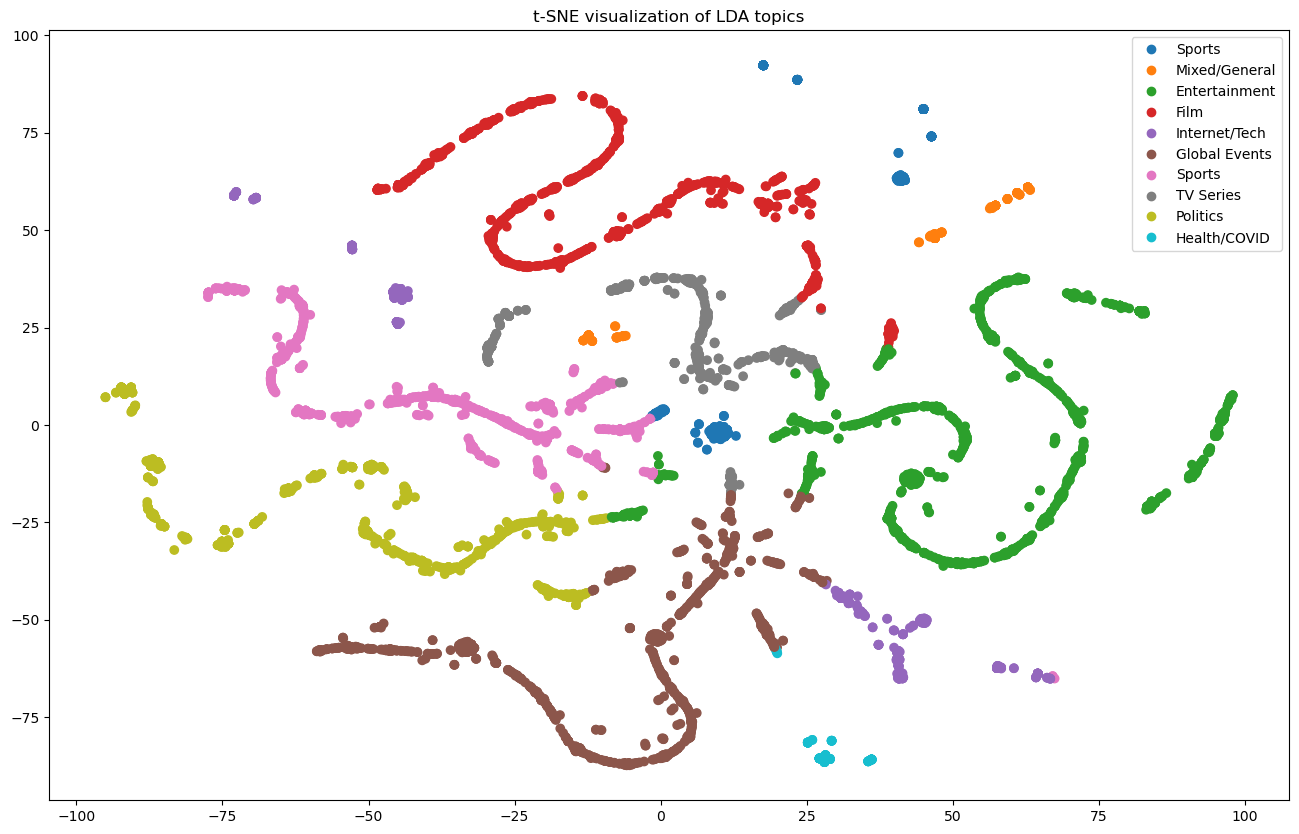

In [33]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(lda_matrix_summaries)

# Visualisation
plt.figure(figsize=(16, 10))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['main_topic'], cmap='tab10')

# Legend
plt.legend(handles=scatter.legend_elements()[0], labels=[topic_labels[i] for i in range(len(topic_labels))])
plt.title('t-SNE visualization of LDA topics')
plt.show()


In [34]:
# Manually assign topic again
df.loc[df['Page'].str.contains('film', case=False), 'main_topic'] = 3
df.loc[df['Page'].str.contains('Wikipedia', case=False), 'main_topic'] = 1
df.loc[df['Page'].str.contains('Deaths in', case=False), 'main_topic'] = 1
df.loc[df['Page'].str.contains('Cleopatra', case=False), 'main_topic'] = 5
df.loc[df['Page'].str.contains('XXX: Return of Xander Cage', case=False), 'main_topic'] = 3
df.loc[df['Page'].str.contains('software', case=False), 'main_topic'] = 4
df.loc[df['Page'].str.contains('F5', case=False), 'main_topic'] = 4
df.loc[df['Page'].str.contains('ufc', case=False), 'main_topic'] = 0
df.loc[df['Page'].str.contains('corona', case=False), 'main_topic'] = 9
df.loc[df['Page'].str.contains('series', case=False), 'main_topic'] = 7
df.loc[df['Page'].str.contains('bigg boss', case=False), 'main_topic'] = 7

# New topic labelling
df['topic_label'] = df['main_topic'].map(topic_labels)

# Examination updated dataframe
for topic in df['main_topic'].unique():
    sample_docs = df[df['main_topic'] == topic].sample(5, random_state=42)
    print(f"Topic: {topic_labels[topic]}")
    for index, row in sample_docs.iterrows():
        print(f"Document {index}: {row['Page']}")
    print("\n")

Topic: Global Events
Document 3448: Catherine the Great
Document 2511: Wayne Williams
Document 4169: Scarlet Witch
Document 2415: Denial-of-service attack
Document 1635: George Soros


Topic: Film
Document 4721: The Unforgivable
Document 5411: Red Notice (film)
Document 5766: Sex
Document 5520: Roma (2018 film)
Document 3953: Home Alone


Topic: TV Series
Document 5975: Only Murders in the Building
Document 4586: The White Lotus
Document 73: Peaky Blinders (TV series)
Document 2115: Sex Education (TV series)
Document 973: Werewolf by Night (TV special)


Topic: Mixed/General
Document 4799: Deaths in 2021
Document 2336: Wikipedia
Document 5038: Wikipedia
Document 2075: Wikipedia
Document 1829: XXXX


Topic: Entertainment
Document 5663: Keanu Reeves
Document 3961: Alia Bhatt
Document 2164: Megan Fox
Document 5966: John Travolta
Document 4667: Sylvester Stallone


Topic: Internet/Tech
Document 4127: F5 Networks
Document 3686: Apple Network Server
Document 3169: Google Translate
Document 5

In [35]:
df[df['Page'] == 'Bigg Boss (Hindi season 16)']

Page  Edits  Editors   Views Mobile %  \
4589  Bigg Boss (Hindi season 16)      0        0  956047     91.8   

            date                                            summary  \
4589  2023-02-01  Bigg Boss 16 also known as  Bigg Boss: Game Ba...   

                                      processed_summary  \
4589  bigg bos 16 also known bigg boss: game badlega...   

                 processed_title  main_topic topic_label  
4589  bigg bos (hindi season 16)           7   TV Series

## 2-5. Visualisation

### (1) T-SNE

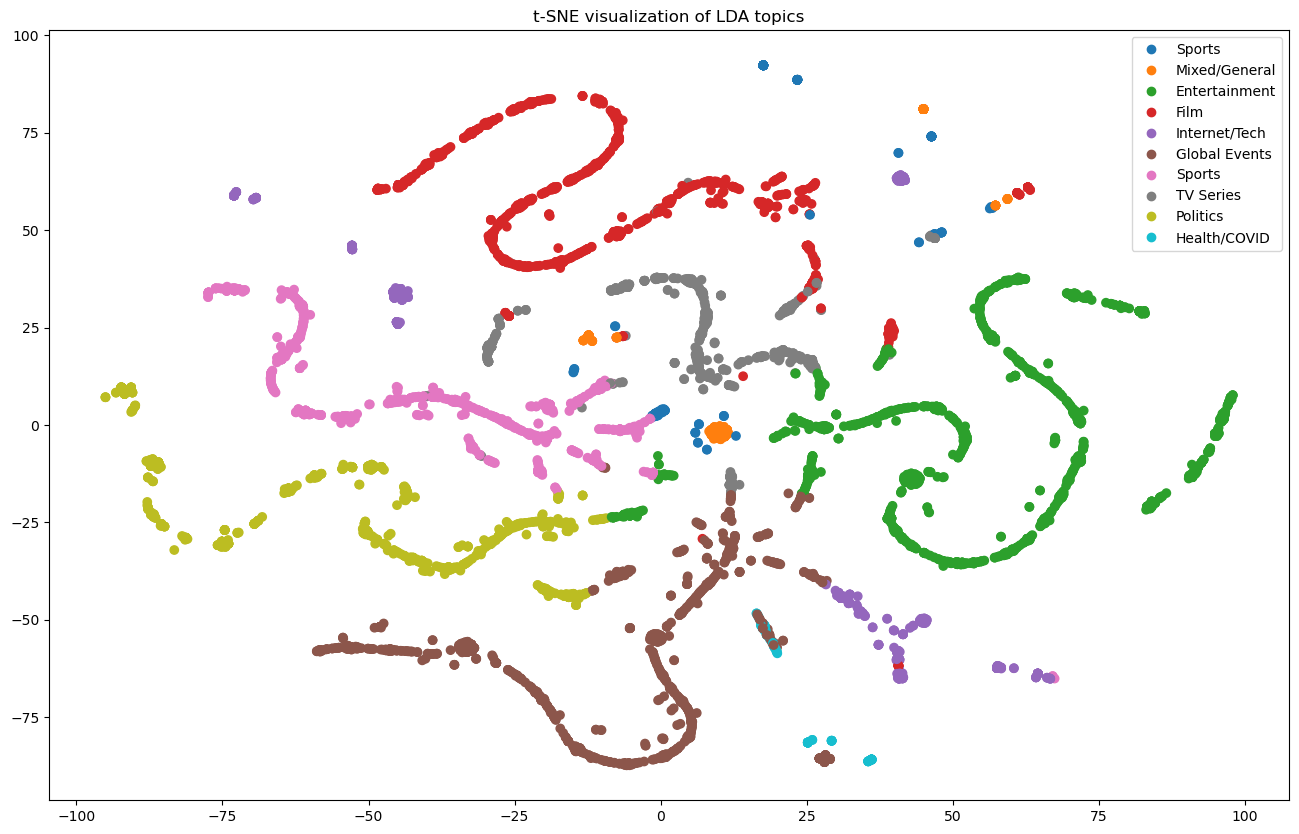

In [36]:
# Column 'main_topic'

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(lda_matrix_summaries)

plt.figure(figsize=(16, 10))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['main_topic'], cmap='tab10')

plt.legend(handles=scatter.legend_elements()[0], labels=[topic_labels[i] for i in range(len(topic_labels))])
plt.title('t-SNE visualization of LDA topics')
plt.show()

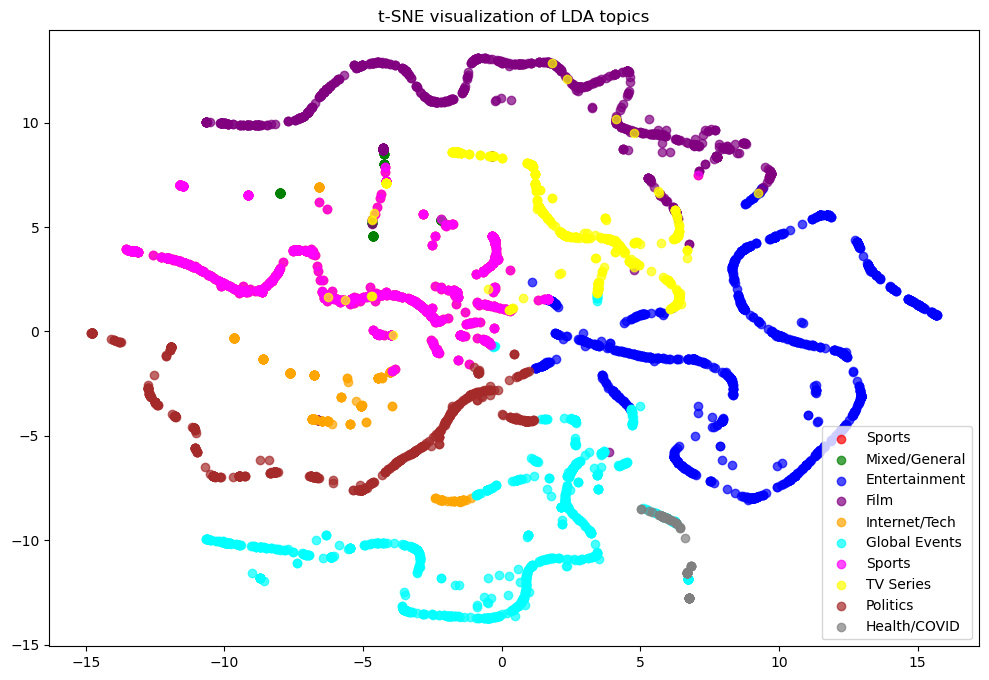

In [37]:
# Column 'topic_label'

tsne_model = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=300)
tsne_lda = tsne_model.fit_transform(lda_matrix_summaries)

tsne_df = pd.DataFrame(tsne_lda, columns=['x', 'y'])
tsne_df['topic'] = df['topic_label']

plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'grey']
for i, label in enumerate(topic_labels.values()):
    plt.scatter(tsne_df[tsne_df['topic'] == label]['x'], tsne_df[tsne_df['topic'] == label]['y'], 
                color=colors[i], label=label, alpha=0.7)
plt.title('t-SNE visualization of LDA topics')
plt.legend()
plt.show()

### (2) WordCloud

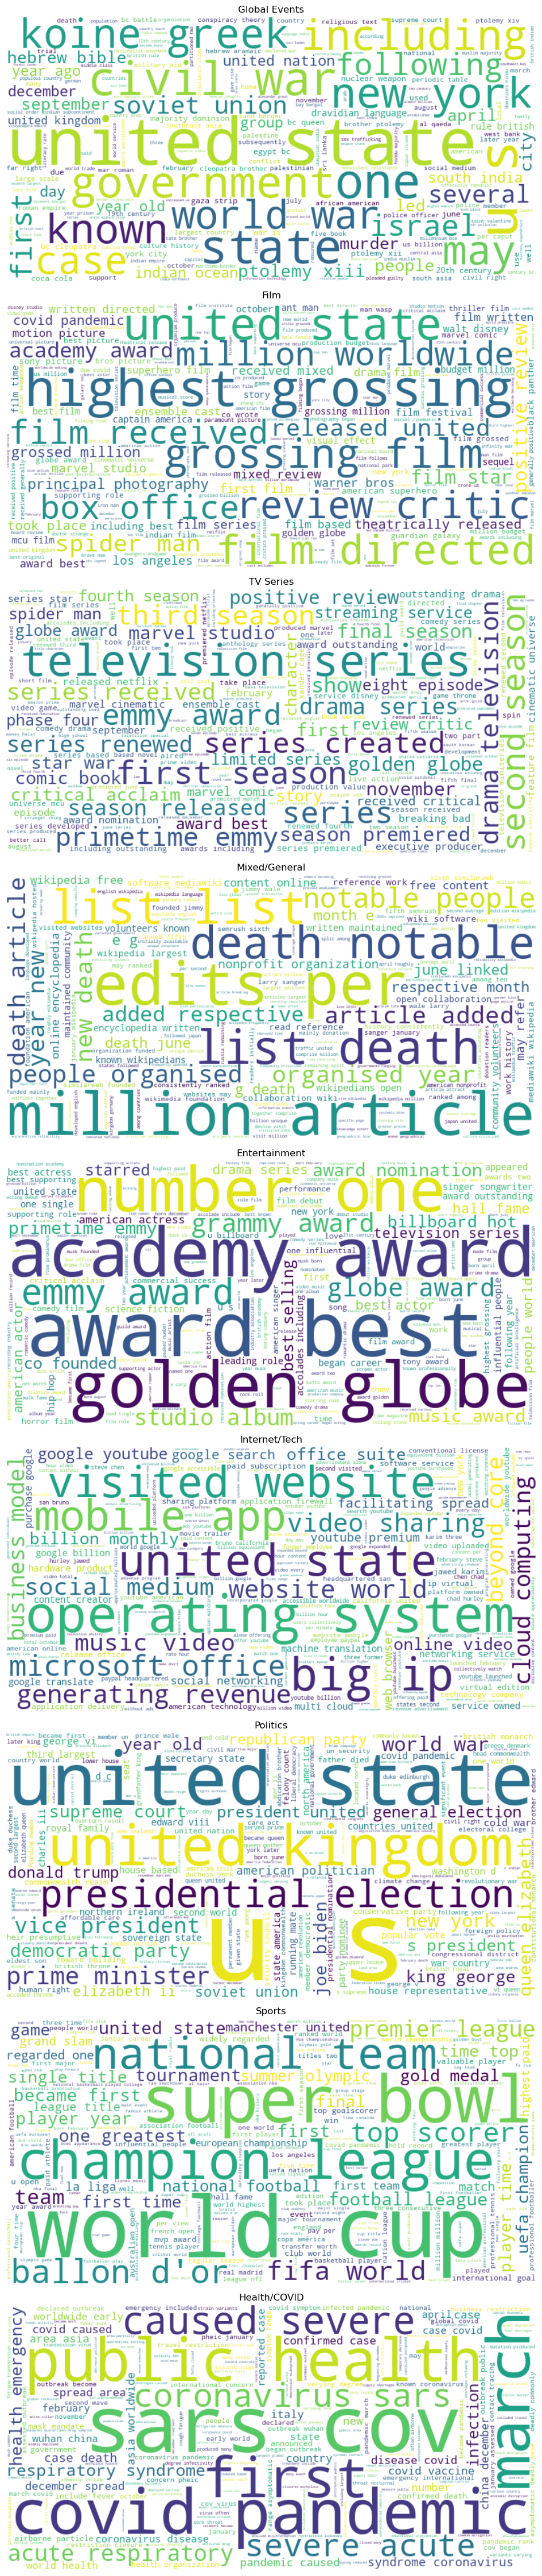

In [38]:
from wordcloud import WordCloud

# Prepare data for word clouds based on topic labels
topic_words_dict = {label: [] for label in df['topic_label'].unique()}
for index, row in df.iterrows():
    topic = row['topic_label']
    words = row['processed_summary'].split()
    topic_words_dict[topic].extend(words)

# Number of topics
num_topics = len(topic_words_dict)

# Create word clouds
fig, axes = plt.subplots(num_topics, 1, figsize=(15, 5 * num_topics), sharex=True, sharey=True)

if num_topics == 1:
    axes = [axes]  # Ensure axes is iterable if only one topic

for ax, (topic_label, words) in zip(axes, topic_words_dict.items()):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(topic_label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [39]:
df

Page  Edits  Editors    Views Mobile %  \
0                      Cleopatra      4        4  5286746     98.9   
1              Top Gun: Maverick   1024      433  4956212     76.4   
2                    Roe v. Wade    305       86  4399634     78.5   
3     Stranger Things (season 4)      0        0  4320822     78.3   
4             Vikram (2022 film)    525      110  4135394     87.2   
...                          ...    ...      ...      ...      ...   
5989                         CEO      0        0   942147      1.7   
5990              Chloe Lattanzi     28       21   935080     82.2   
5991            Biagio da Cesena      9        8   933621     82.8   
5992           Microsoft Windows      3        2   932748      7.1   
5993                Harry Styles     13       12   928199     79.1   

            date                                            summary  \
0     2022-06-01  Cleopatra VII Thea Philopator (Koinē Greek: Κλ...   
1     2022-06-01  Top Gun: Maverick is a 2022 American action dr...   
2     2022-06-01  Roe v. Wade, 410 U.S. 113 (1973), was a landma...   
3     2022-06-01  The fourth season of the American science fict...   
4     2022-06-01  Vikram is a 2022 Indian Tamil-language action ...   
...          ...                                                ...   
5989  2022-08-01  A chief executive officer (CEO) (chief executi...   
5990  2022-08-01  Chloe Rose Lattanzi (born January 17, 1986) is...   
5991  2022-08-01  Biagio Martinelli (Cesena 1463 – Rome 1544), b...   
5992  2022-08-01  Microsoft Windows is a product line of proprie...   
5993  2022-08-01  Harry Edward Styles (born 1 February 1994) is ...   

                                      processed_summary  \
0     cleopatra vii thea philopator (koinē greek: κλ...   
1     top gun: maverick 2022 american action drama f...   
2     roe v. wade, 410 u.s. 113 (1973), landmark dec...   
3     fourth season american science fiction horror ...   
4     vikram 2022 indian tamil-language action thril...   
...                                                 ...   
5989  chief executive officer (ceo) (chief executive...   
5990  chloe rose lattanzi (born january 17, 1986) am...   
5991  biagio martinelli (cesena 1463 – rome 1544), b...   
5992  microsoft window product line proprietary grap...   
5993  harry edward style (born 1 february 1994) engl...   

                processed_title  main_topic    topic_label  
0                     cleopatra           5  Global Events  
1             top gun: maverick           3           Film  
2                   roe v. wade           5  Global Events  
3     stranger thing (season 4)           7      TV Series  
4            vikram (2022 film)           3           Film  
...                         ...         ...            ...  
5989                        ceo           1  Mixed/General  
5990             chloe lattanzi           2  Entertainment  
5991           biagio da cesena           5  Global Events  
5992           microsoft window           4  Internet/Tech  
5993                harry style           2  Entertainment  

[5994 rows x 11 columns]

## 2-6. Sub-Topic Modelling

In [40]:
# Fit LDA models for each main topic to identify sub-topics
sub_topic_dict = {}
for main_topic in range(10):
    sub_data = df[df['main_topic'] == main_topic]['processed_summary']
    if sub_data.empty:
        continue
    sub_tfidf = tfidf_vectorizer_summaries.fit_transform(sub_data)
    lda_sub_topics = LatentDirichletAllocation(n_components=3, random_state=42)
    lda_sub_model = lda_sub_topics.fit(sub_tfidf)
    sub_topics = display_topics(lda_sub_model, tfidf_vectorizer_summaries.get_feature_names_out(), 10)
    sub_topic_dict[main_topic] = sub_topics

# Display sub-topics for each main topic
for main_topic, sub_topics in sub_topic_dict.items():
    print(f"\nMain Topic #{main_topic+1} Sub-Topics:")
    for sub_topic, words in sub_topics.items():
        print(f"  Sub-Topic #{sub_topic+1}: {' '.join(words)}")


Main Topic #1 Sub-Topics:
  Sub-Topic #1: player ronaldo club league world time top goal messi career
  Sub-Topic #2: league premier club manchester city english right may efl 1992
  Sub-Topic #3: ufc event place martial ultimate fighting vs art mixed took

Main Topic #2 Sub-Topics:
  Sub-Topic #1: wikipedia million bias largest among per ranked english similarweb criticized
  Sub-Topic #2: to refer xxxx may brand bf xxx castlemaine queensland ale
  Sub-Topic #3: death list year added respective new notable here june people

Main Topic #3 Sub-Topics:
  Sub-Topic #1: album music single billboard one artist number record released song
  Sub-Topic #2: musk company tesla founded university acquired twitter prize inc co
  Sub-Topic #3: film award role series actor drama actress comedy television starred

Main Topic #4 Sub-Topics:
  Sub-Topic #1: film best 2019 2023 million 2022 received released 2021 2020
  Sub-Topic #2: xxx sex film cage list avatar female male diesel 3d
  Sub-Topic #3: m

# [Analysis]

## 1. Whole Period (from Jan-2019 to Dec-2023)

* Which topic has the most number of edits and views?
* What topics have a sudden trend of rising views over the entire period?

In [41]:
# Stats by topics
topic_stats = df.groupby('topic_label').agg({
    'Edits': 'sum',
    'Editors': 'sum',
    'Views': 'sum'
}).reset_index()

topic_stats

topic_label   Edits  Editors       Views
0  Entertainment  141673    61148  2131967578
1           Film  247643    84128  1867239995
2  Global Events  124904    45756  2021370871
3   Health/COVID    6767     2262   218950247
4  Internet/Tech   11630     5765   686332130
5  Mixed/General  110914    11699   452771613
6       Politics  128022    44040  1631907151
7         Sports  172284    55254  1554939919
8      TV Series   77890    29579   939558736

In [42]:
# Stats by topics and month
df['date'] = pd.to_datetime(df['date'])

monthly_stats = df.groupby([df['topic_label'], df['date'].dt.to_period('M')]).agg({
    'Edits': 'sum',
    'Editors': 'sum',
    'Views': 'sum'
}).reset_index()

monthly_stats

topic_label     date  Edits  Editors     Views
0    Entertainment  2019-01   2288     1000  42579141
1    Entertainment  2019-02   4578     1901  65844517
2    Entertainment  2019-03   4718     1935  65836396
3    Entertainment  2019-04   1902      973  48520406
4    Entertainment  2019-05   2811     1408  53462181
..             ...      ...    ...      ...       ...
492      TV Series  2023-08    539      179   5589924
493      TV Series  2023-09    857      364   8955605
494      TV Series  2023-10    538      227  12240824
495      TV Series  2023-11    543      171   8216415
496      TV Series  2023-12    200       71   5413717

[497 rows x 5 columns]

In [43]:
print(df.dtypes)

Page                         object
Edits                         int64
Editors                       int64
Views                         int64
Mobile %                     object
date                 datetime64[ns]
summary                      object
processed_summary            object
processed_title              object
main_topic                    int64
topic_label                  object
dtype: object


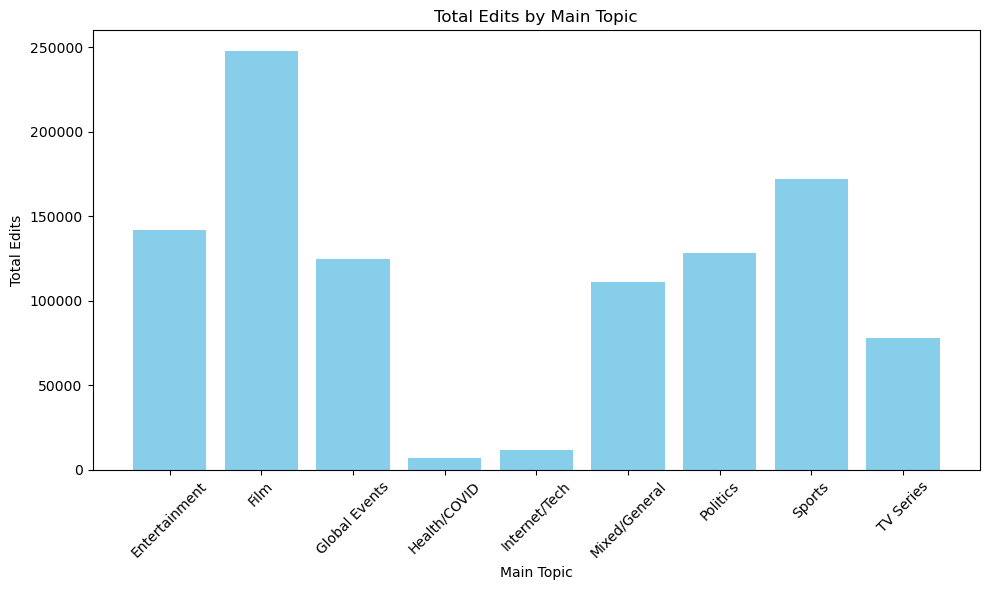

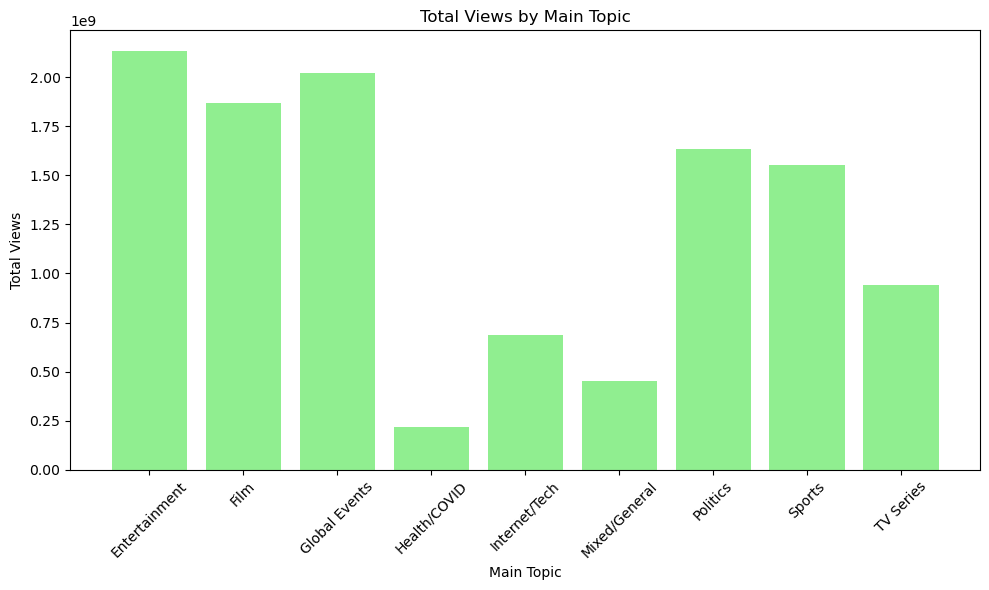

In [44]:
import matplotlib.pyplot as plt

# Visualisation for total edits by topics
plt.figure(figsize=(10, 6))
plt.bar(topic_stats['topic_label'], topic_stats['Edits'], color='skyblue')
plt.xlabel('Main Topic')
plt.ylabel('Total Edits')
plt.title('Total Edits by Main Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation for total views by topics
plt.figure(figsize=(10, 6))
plt.bar(topic_stats['topic_label'], topic_stats['Views'], color='lightgreen')
plt.xlabel('Main Topic')
plt.ylabel('Total Views')
plt.title('Total Views by Main Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

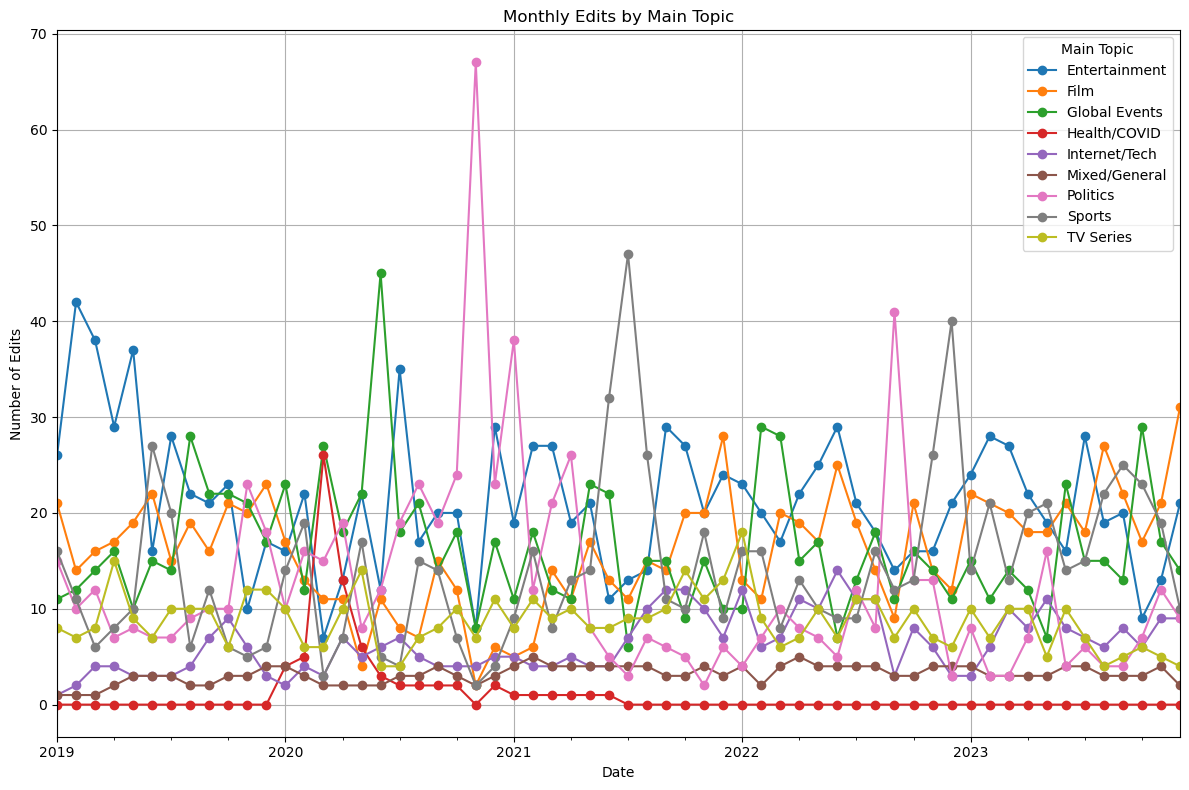

In [45]:
# Visualisation for monthly edits by topics

df['date'] = pd.to_datetime(df['date'])
daily_edits = df.groupby(['date', 'topic_label']).size().unstack(fill_value=0)
daily_edits.plot(kind='line', figsize=(12, 8), marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Edits')
plt.title('Monthly Edits by Main Topic')
plt.legend(title='Main Topic', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

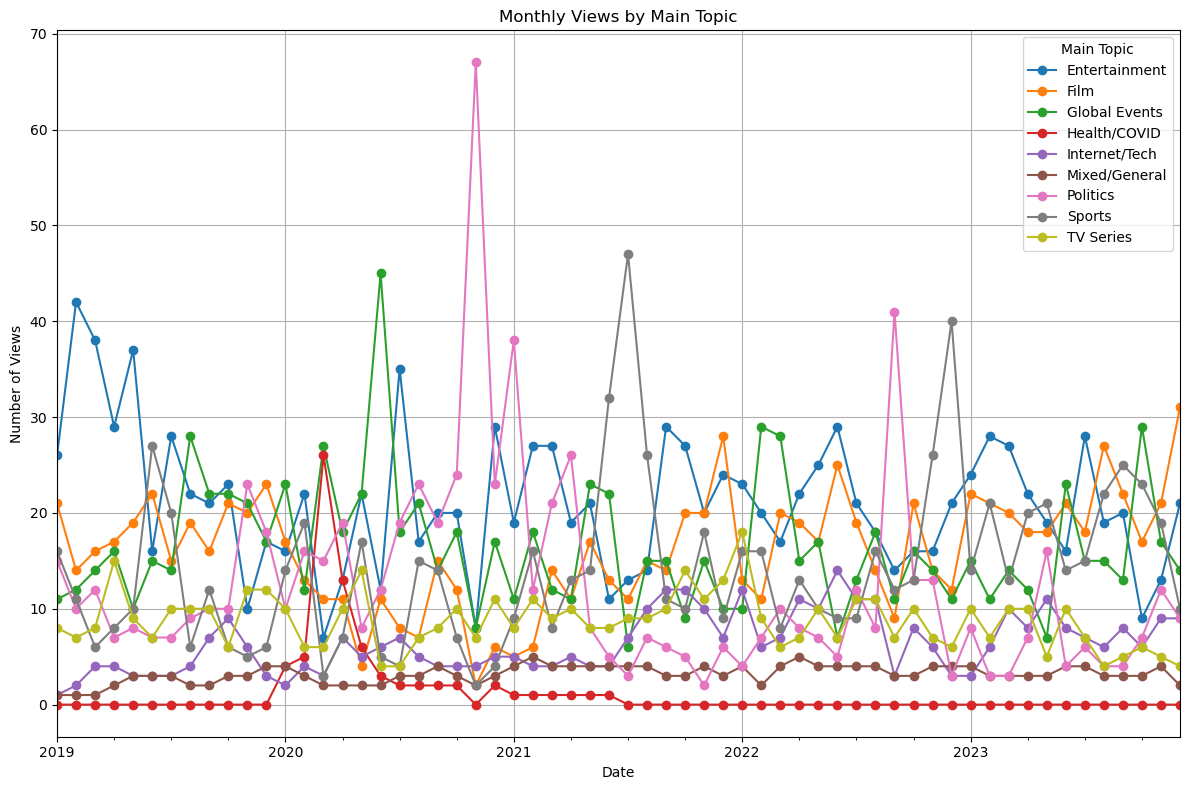

In [46]:
# Visualisation for monthly views by topics

df['date'] = pd.to_datetime(df['date'])
daily_edits = df.groupby(['date', 'topic_label']).size().unstack(fill_value=0)
daily_edits.plot(kind='line', figsize=(12, 8), marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Views')
plt.title('Monthly Views by Main Topic')
plt.legend(title='Main Topic', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

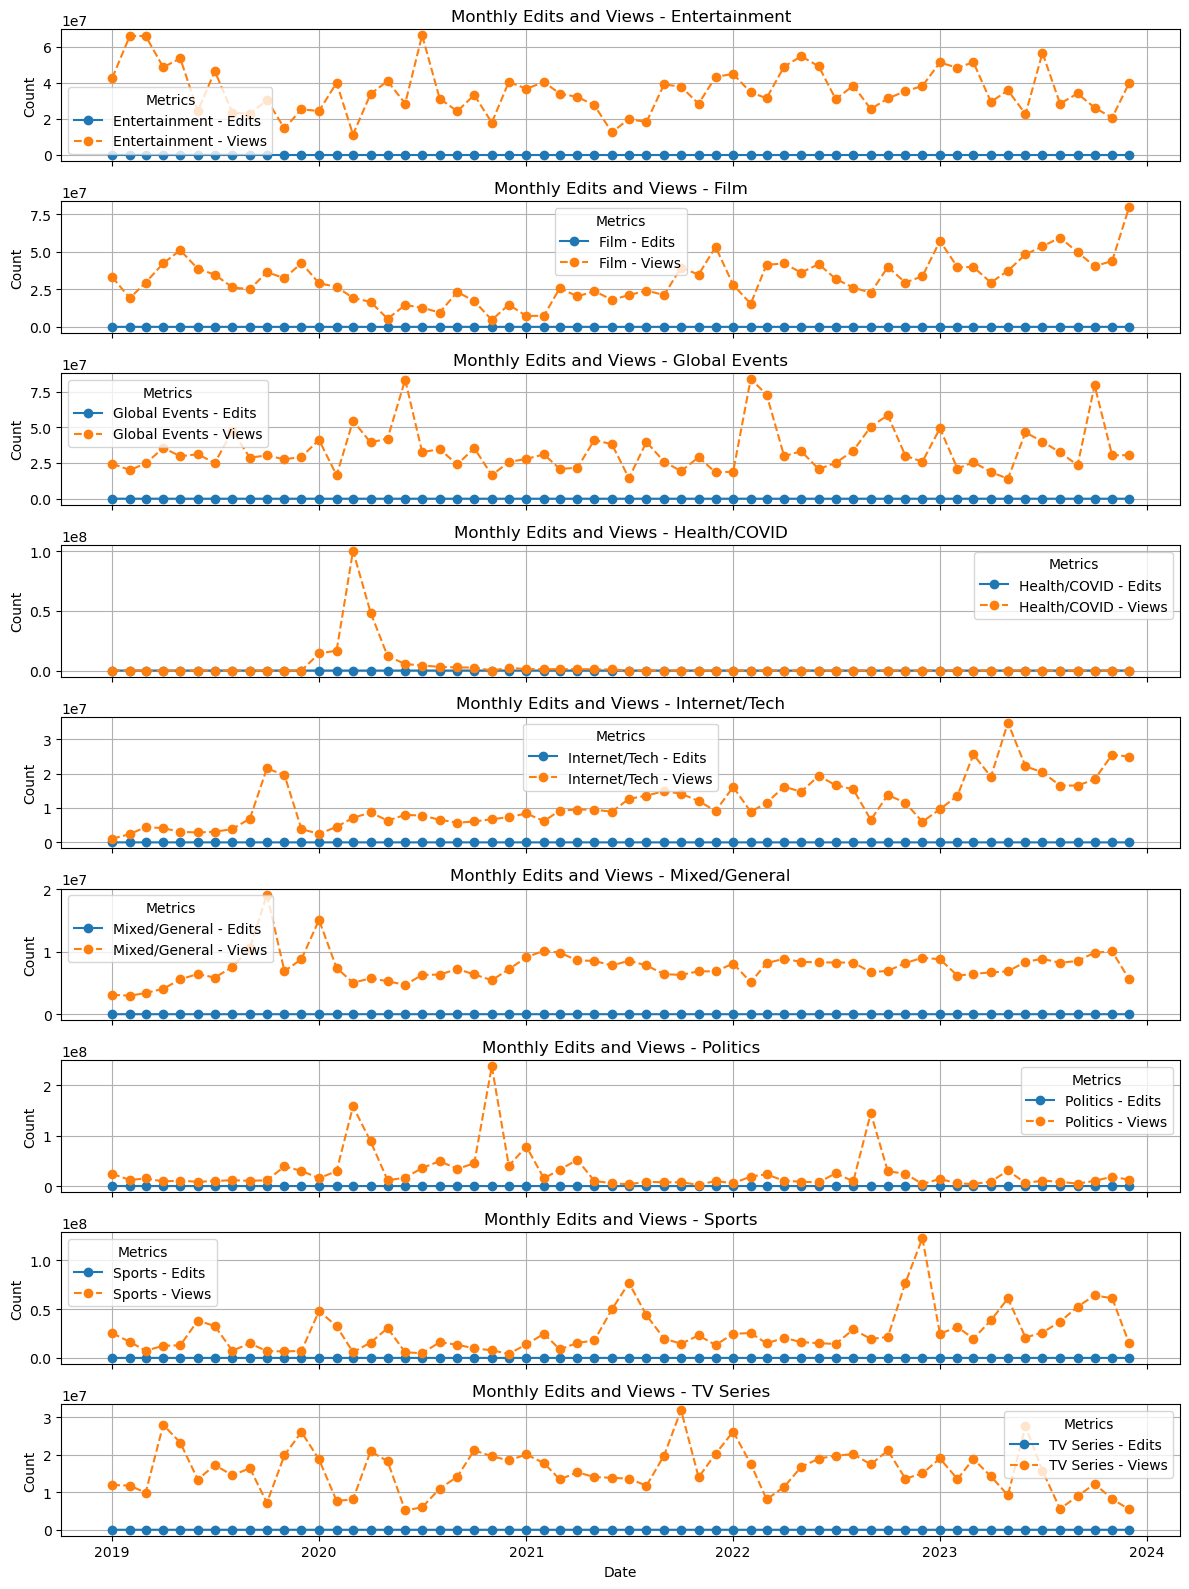

In [47]:
# Calculation of monthly edits and views
monthly_stats = df.groupby([df['date'].dt.to_period('M'), 'topic_label']).agg({
    'Edits': 'sum',
    'Views': 'sum'
}).unstack(fill_value=0)

# Setting for visualisation of each topic graphs
topics = monthly_stats.columns.levels[1]
num_topics = len(topics)

# Subplots by each topics
fig, axs = plt.subplots(num_topics, 1, figsize=(12, 16), sharex=True)

for i, topic in enumerate(topics):
    
    dates = monthly_stats.index.to_timestamp()
    axs[i].plot(dates, monthly_stats['Edits'][topic], marker='o', label=f'{topic} - Edits')
    axs[i].plot(dates, monthly_stats['Views'][topic], marker='o', linestyle='--', label=f'{topic} - Views')

    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Monthly Edits and Views - {topic}')
    axs[i].legend(title='Metrics', loc='best')
    axs[i].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

## 2. Specific Topic

## * Page, 'Squid Game' on the topic, 'TV Series' (Oct-2021)

In [49]:
# A specific month when the number of views increases on the topic 'TV Series'
peak_date_tv = '2021-10-01'  
peak_pages_tv = df[(df['topic_label'] == 'TV Series') & (df['date'] == peak_date_tv)]

# Check Pages by Top Views
top_pages_tv = peak_pages_tv.sort_values(by='Views', ascending=False)

top_pages_tv

Page  Edits  Editors     Views Mobile %  \
4995                    Squid Game   1121      240  14143776     74.6   
5013    Midnight Mass (miniseries)    151       52   1971337     79.2   
5014               You (TV series)    124       58   1954399     71.1   
5017                You (season 3)      0        0   1910906     81.5   
5021             Maid (miniseries)    155       46   1831369     79.1   
5031                     Ted Lasso    237       62   1497436     69.8   
5047        Succession (TV series)    146       44   1228294     64.8   
5050             XXX (film series)      9        8   1191481     97.4   
5057     Michael Myers (Halloween)     79       55   1102664     81.6   
5063               Anupam Tripathi    208       98   1082863     77.6   
5066  Only Murders in the Building    155       73   1067388     71.5   
5069       What If...? (TV series)    173       55   1047027     58.3   
5076     Sex Education (TV series)     78       33    991053     73.9   
5091        Foundation (TV series)    137       55    912040     52.3   

           date                                            summary  \
4995 2021-10-01  Squid Game (Korean: 오징어 게임) is a South Korean ...   
5013 2021-10-01  Midnight Mass is an American gothic supernatur...   
5014 2021-10-01  You is an American psychological thriller tele...   
5017 2021-10-01  The third season of the American psychological...   
5021 2021-10-01  Maid is an American drama limited series creat...   
5031 2021-10-01  Ted Lasso ( LASS-oh) is an American sports com...   
5047 2021-10-01  Succession is an American satirical black come...   
5050 2021-10-01  XXX (stylized as xXx and pronounced Triple X) ...   
5057 2021-10-01  Michael Myers is a character from the slasher ...   
5063 2021-10-01  Anupam Tripathi (born 2 November 1988) is an I...   
5066 2021-10-01  Only Murders in the Building is an American my...   
5069 2021-10-01  What If...? is an American animated anthology ...   
5076 2021-10-01  Sex Education is a British teen sex comedy dra...   
5091 2021-10-01  Foundation is an American science fiction tele...   

                                      processed_summary  \
4995  squid game (korean: 오징어 게임) south korean telev...   
5013  midnight mass american gothic supernatural hor...   
5014  american psychological thriller television ser...   
5017  third season american psychological thriller t...   
5021  maid american drama limited series created net...   
5031  ted lasso ( lass-oh) american sport comedy-dra...   
5047  succession american satirical black comedy-dra...   
5050  xxx (stylized xxx pronounced triple x) america...   
5057  michael myers character slasher film series ha...   
5063  anupam tripathi (born 2 november 1988) indian ...   
5066  murder building american mystery comedy-drama ...   
5069  if...? american animated anthology television ...   
5076  sex education british teen sex comedy drama te...   
5091  foundation american science fiction television...   

                 processed_title  main_topic topic_label  
4995                  squid game           7   TV Series  
5013  midnight mass (miniseries)           7   TV Series  
5014                 (tv series)           7   TV Series  
5017                  (season 3)           7   TV Series  
5021           maid (miniseries)           7   TV Series  
5031                   ted lasso           7   TV Series  
5047      succession (tv series)           7   TV Series  
5050           xxx (film series)           7   TV Series  
5057   michael myers (halloween)           7   TV Series  
5063             anupam tripathi           7   TV Series  
5066             murder building           7   TV Series  
5069          if...? (tv series)           7   TV Series  
5076   sex education (tv series)           7   TV Series  
5091      foundation (tv series)           7   TV Series

In [51]:
# Filtering the month '2021-10-01'
df_20211001 = df[df['date'] == '2021-10-01']

# Calculation total views of '2022-09-01'
total_views_20211001 = df_20211001['Views'].sum()

# Views of the Page, 'Squid Game'
views_squid_game = df_20211001.loc[df_20211001['Page'] == 'Squid Game', 'Views'].values[0]

# Proportion of views of the Page, 'Elizabeth II'
ratio_squid_game = views_squid_game / total_views_20211001

print(f"The proportion of views of the Page, 'Squid Game' on Oct, 2021 in the topic, 'TV Series': {ratio_squid_game:.2%}")

The proportion of views of the Page, 'Squid Game' on Oct, 2021 in the topic, 'TV Series': 8.29%


/var/folders/_b/zksqq78d6tb0mb13kw60kp6h0000gn/T/ipykernel_51524/3159083700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_game_data['date'] = pd.to_datetime(squid_game_data['date'])


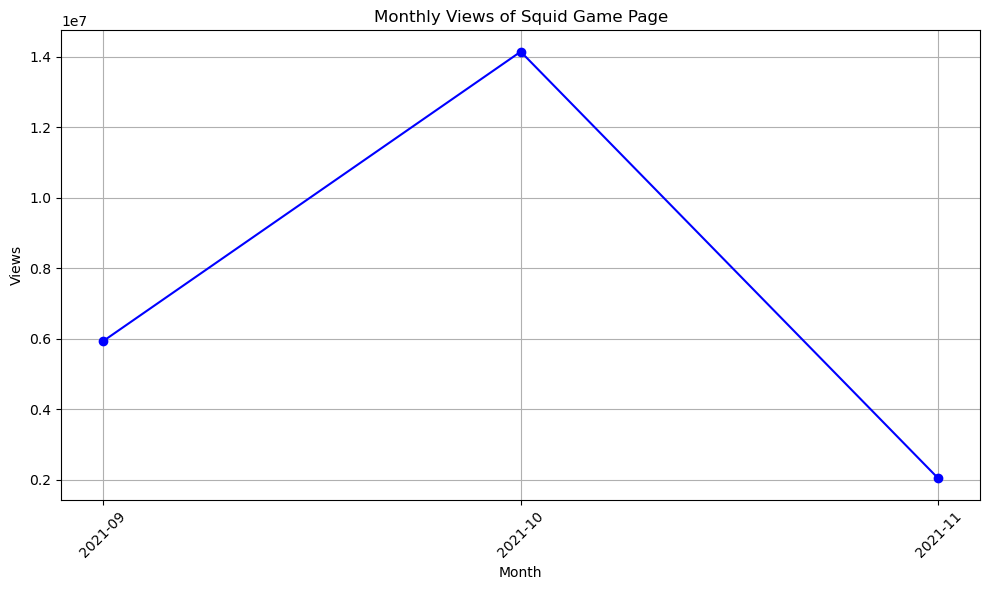

In [54]:
# Page, 'Squid Game'
squid_game_data = df[df['Page'] == 'Squid Game']

# Changes format of 'date' to the format 'datetime'
squid_game_data['date'] = pd.to_datetime(squid_game_data['date'])

# Monthly views
monthly_views_tv = squid_game_data.set_index('date')['Views'].resample('M').sum()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(monthly_views_tv.index.strftime('%Y-%m'), monthly_views_tv.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Views of Squid Game Page')
plt.xlabel('Month')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
monthly_views_tv

date
2021-09-30     5929582
2021-10-31    14143776
2021-11-30     2033385
Freq: M, Name: Views, dtype: int64

## * Page, 'Donald Trump' & 'Joe Biden' on the topic, 'Politics' (Nov-2020)]

In [58]:
# A specific month when the number of views increases on the topic 'Politics'
peak_date_1 = '2020-03-01'  
peak_pages_1 = df[(df['topic_label'] == 'Politics') & (df['date'] == peak_date_1)]

# Check Pages by Top Views
top_pages_1 = peak_pages_1.sort_values(by='Views', ascending=False)

top_pages_1

Page  Edits  Editors  \
200                               United States Senate      8        3   
212       2020 Democratic Party presidential primaries    981      235   
217                                       Andrew Cuomo     34       22   
230                                          Joe Biden    276       81   
241                                       Donald Trump    232       56   
244                                     Bernie Sanders     78       41   
246                                        Chris Cuomo     24       15   
248                                       Donald trump      0        0   
251                                       Elizabeth II     27       17   
252                                      United States    148       47   
256                                      Super Tuesday     62       34   
258                                      Anthony Fauci    205      100   
270                                      Boris Johnson     74       47   
284                                        Mario Cuomo     32       25   
290  Stafford Disaster Relief and Emergency Assista...     54       31   

         Views Mobile %       date  \
200  132741408     99.9 2020-03-01   
212    4012840     51.7 2020-03-01   
217    3056707     70.7 2020-03-01   
230    2023868     65.2 2020-03-01   
241    1744669     69.9 2020-03-01   
244    1706674     67.0 2020-03-01   
246    1638143     73.6 2020-03-01   
248    1535580      0.3 2020-03-01   
251    1513494     77.7 2020-03-01   
252    1506603     60.0 2020-03-01   
256    1435103     66.5 2020-03-01   
258    1401616     69.4 2020-03-01   
270    1241906     73.4 2020-03-01   
284    1143418     73.2 2020-03-01   
290    1109482     78.9 2020-03-01   

                                               summary  \
200  The United States Senate is the upper chamber ...   
212  Presidential primaries and caucuses were organ...   
217  Andrew Mark Cuomo ( KWOH-moh, Italian: [ˈkwɔːm...   
230  Joseph Robinette Biden Jr. (  BY-dən; born Nov...   
241  Donald John Trump (born June 14, 1946) is an A...   
244  Bernard  Sanders (born September 8, 1941) is a...   
246  Christopher Charles Cuomo ( KWOH-moh; born Aug...   
248  Donald John Trump (born June 14, 1946) is an A...   
251  Elizabeth II (Elizabeth Alexandra Mary; 21 Apr...   
252  The United States of America (USA or U.S.A.), ...   
256  Super Tuesday is the United States presidentia...   
258  Anthony Stephen Fauci ( FOW-chee; born Decembe...   
270  Alexander Boris de Pfeffel Johnson (born 19 Ju...   
284  Mario Matthew Cuomo ( KWOH-moh, Italian: [ˈkwɔ...   
290  The Robert T. Stafford Disaster Relief and Eme...   

                                     processed_summary  \
200  united state senate upper chamber united state...   
212  presidential primary caucus organized democrat...   
217  andrew mark cuomo ( kwoh-moh, italian: [ˈkwɔːm...   
230  joseph robinette biden jr. ( by-dən; born nove...   
241  donald john trump (born june 14, 1946) america...   
244  bernard sander (born september 8, 1941) americ...   
246  christopher charles cuomo ( kwoh-moh; born aug...   
248  donald john trump (born june 14, 1946) america...   
251  elizabeth ii (elizabeth alexandra mary; 21 apr...   
252  united state america (usa u.s.a.), commonly kn...   
256  super tuesday united state presidential primar...   
258  anthony stephen fauci ( fow-chee; born decembe...   
270  alexander boris de pfeffel johnson (born 19 ju...   
284  mario matthew cuomo ( kwoh-moh, italian: [ˈkwɔ...   
290  robert t. stafford disaster relief emergency a...   

                                       processed_title  main_topic topic_label  
200                                united state senate           8    Politics  
212         2020 democratic party presidential primary           8    Politics  
217                                       andrew cuomo           8    Politics  
230                                          joe biden           8    Poli

In [63]:
# A specific month when the number of views increases on the topic 'Politics'
peak_date_2 = '2020-11-01'  
peak_pages_2 = df[(df['topic_label'] == 'Politics') & (df['date'] == peak_date_2)]

# Check Pages by Top Views
top_pages_2 = peak_pages_2.sort_values(by='Views', ascending=False)

top_pages_2

Page  Edits  Editors  \
1000                                       Donald Trump    522      144   
1001                                          Joe Biden    535      216   
1002                                      Kamala Harris    292      133   
1003           2020 United States presidential election   1818      435   
1004           2016 United States presidential election     48       32   
...                                                 ...    ...      ...   
1095  Voter turnout in the United States presidentia...      1        1   
1096                                        Ivana Trump     64       48   
1097                                      Stacey Abrams     86       62   
1098                                        John McCain     16       13   
1099                              Franklin D. Roosevelt     21       15   

         Views Mobile %       date  \
1000  28053758     81.2 2020-11-01   
1001  16278499     76.6 2020-11-01   
1002  16118913     82.3 2020-11-01   
1003  12451251     56.5 2020-11-01   
1004  11372871     63.6 2020-11-01   
...        ...      ...        ...   
1095   1271319     62.3 2020-11-01   
1096   1258096     82.6 2020-11-01   
1097   1252744     75.4 2020-11-01   
1098   1249249     67.9 2020-11-01   
1099   1240795     66.5 2020-11-01   

                                                summary  \
1000  Donald John Trump (born June 14, 1946) is an A...   
1001  Joseph Robinette Biden Jr. (  BY-dən; born Nov...   
1002  Kamala Devi Harris (  KAH-mə-lə DAY-vee; born ...   
1003  The 2020 United States presidential election w...   
1004  The 2016 United States presidential election w...   
...                                                 ...   
1095  Voter turnout in US elections is measured as a...   
1096  Ivana Marie Trump (née Zelníčková, Czech: [ˈzɛ...   
1097  Stacey Yvonne Abrams (; born December 9, 1973)...   
1098  John Sidney McCain III (August 29, 1936 – Augu...   
1099  Franklin Delano Roosevelt (January 30, 1882 – ...   

                                      processed_summary  \
1000  donald john trump (born june 14, 1946) america...   
1001  joseph robinette biden jr. ( by-dən; born nove...   
1002  kamala devi harris ( kah-mə-lə day-vee; born o...   
1003  2020 united state presidential election 59th q...   
1004  2016 united state presidential election 58th q...   
...                                                 ...   
1095  voter turnout u election measured percentage, ...   
1096  ivana marie trump (née zelníčková, czech: [ˈzɛ...   
1097  stacey yvonne abrams (; born december 9, 1973)...   
1098  john sidney mccain iii (august 29, 1936 – augu...   
1099  franklin delano roosevelt (january 30, 1882 – ...   

                                       processed_title  main_topic topic_label  
1000                                      donald trump           8    Politics  
1001                                         joe biden           8    Politics  
1002                                     kamala harris           8    Politics  
1003           2020 united state presidential election           8    Politics  
1004           2016 united state presidential election           8    Politics  
...                                                ...         ...         ...  
1095  voter turnout united state presidential election           8    Politics  
1096                                       ivana trump           8    Politics  
1097                                     stacey abrams           8    Politics  
1098                                       john mccain           8    Politics  
1099                             franklin d. roosevelt           8    Politics  

[67 rows x 11 columns]

### Donald Trump

/var/folders/_b/zksqq78d6tb0mb13kw60kp6h0000gn/T/ipykernel_51524/1176877075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donald_trump_data['date'] = pd.to_datetime(donald_trump_data['date'])


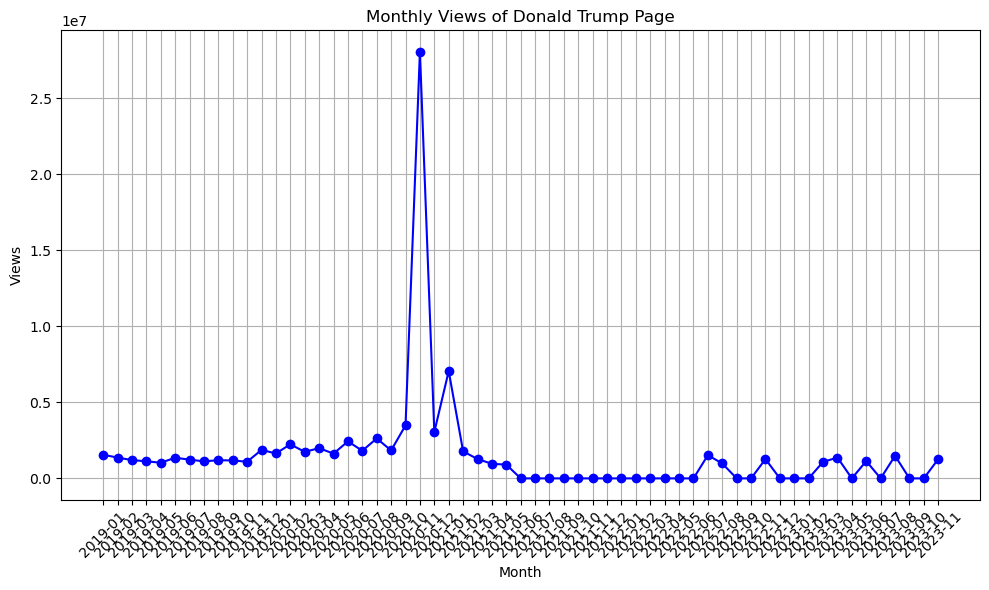

In [60]:
# Page, 'Donald Trump'
donald_trump_data = df[df['Page'] == 'Donald Trump']

# Changes format of 'date' to the format 'datetime'
donald_trump_data['date'] = pd.to_datetime(donald_trump_data['date'])

# Monthly views
monthly_views_trump = donald_trump_data.set_index('date')['Views'].resample('M').sum()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(monthly_views_trump.index.strftime('%Y-%m'), monthly_views_trump.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Views of Donald Trump Page')
plt.xlabel('Month')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
monthly_views_trump

date
2019-01-31     1549440
2019-02-28     1369806
2019-03-31     1201151
2019-04-30     1124656
2019-05-31     1028094
2019-06-30     1356645
2019-07-31     1232089
2019-08-31     1119473
2019-09-30     1194858
2019-10-31     1178659
2019-11-30     1094589
2019-12-31     1872670
2020-01-31     1638210
2020-02-29     2240121
2020-03-31     1744669
2020-04-30     1988252
2020-05-31     1627956
2020-06-30     2434614
2020-07-31     1815688
2020-08-31     2626963
2020-09-30     1836366
2020-10-31     3483339
2020-11-30    28053758
2020-12-31     3046898
2021-01-31     7056263
2021-02-28     1776597
2021-03-31     1273084
2021-04-30      959414
2021-05-31      905092
2021-06-30           0
2021-07-31           0
2021-08-31           0
2021-09-30           0
2021-10-31           0
2021-11-30           0
2021-12-31           0
2022-01-31           0
2022-02-28           0
2022-03-31           0
2022-04-30           0
2022-05-31           0
2022-06-30           0
2022-07-31     1524832
2022-0

In [66]:
# Convert monthly_views to DataFrame
df_views_trump = pd.DataFrame({'date': monthly_views_trump.index, 'views': monthly_views_trump.values})

# Convert date column to datetime format
df_views_trump['date'] = pd.to_datetime(df_views_trump['date'])

print(df_views_trump)

         date     views
0  2019-01-31   1549440
1  2019-02-28   1369806
2  2019-03-31   1201151
3  2019-04-30   1124656
4  2019-05-31   1028094
5  2019-06-30   1356645
6  2019-07-31   1232089
7  2019-08-31   1119473
8  2019-09-30   1194858
9  2019-10-31   1178659
10 2019-11-30   1094589
11 2019-12-31   1872670
12 2020-01-31   1638210
13 2020-02-29   2240121
14 2020-03-31   1744669
15 2020-04-30   1988252
16 2020-05-31   1627956
17 2020-06-30   2434614
18 2020-07-31   1815688
19 2020-08-31   2626963
20 2020-09-30   1836366
21 2020-10-31   3483339
22 2020-11-30  28053758
23 2020-12-31   3046898
24 2021-01-31   7056263
25 2021-02-28   1776597
26 2021-03-31   1273084
27 2021-04-30    959414
28 2021-05-31    905092
29 2021-06-30         0
30 2021-07-31         0
31 2021-08-31         0
32 2021-09-30         0
33 2021-10-31         0
34 2021-11-30         0
35 2021-12-31         0
36 2022-01-31         0
37 2022-02-28         0
38 2022-03-31         0
39 2022-04-30         0
40 2022-05-31   

In [67]:
!pip install pytrends

In [68]:
from pytrends.request import TrendReq

In [71]:
# Google Trends API
pytrends = TrendReq(hl='en-US', tz=360)

# Setting keyword
keywords = ["Donald Trump"]

# Setting period
start_date = '2019-01-01'
end_date = '2023-12-31'

# Extract weekly data
pytrends.build_payload(keywords, cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')

# Extract data over time
interest_over_time_df = pytrends.interest_over_time()

# Calculate weekly data to monthly data
interest_over_time_df.index = pd.to_datetime(interest_over_time_df.index)
monthly_interest_trump = interest_over_time_df.resample('M').mean()

In [72]:
monthly_interest_trump

Donald Trump  isPartial
date                               
2018-12-31         13.00        0.0
2019-01-31         14.50        0.0
2019-02-28         12.25        0.0
2019-03-31          9.80        0.0
2019-04-30          8.75        0.0
...                  ...        ...
2023-08-31          6.75        0.0
2023-09-30          3.25        0.0
2023-10-31          3.20        0.0
2023-11-30          3.00        0.0
2023-12-31          3.40        0.0

[61 rows x 2 columns]

In [73]:
# Combine data (wikipedia and google trend by date)
df_combined_trump = pd.merge(df_views_trump, monthly_interest_trump, on='date')
df_combined_trump

date     views  Donald Trump  isPartial
0  2019-01-31   1549440         14.50        0.0
1  2019-02-28   1369806         12.25        0.0
2  2019-03-31   1201151          9.80        0.0
3  2019-04-30   1124656          8.75        0.0
4  2019-05-31   1028094          9.00        0.0
5  2019-06-30   1356645         10.60        0.0
6  2019-07-31   1232089         10.25        0.0
7  2019-08-31   1119473         10.50        0.0
8  2019-09-30   1194858         11.00        0.0
9  2019-10-31   1178659         11.75        0.0
10 2019-11-30   1094589         11.75        0.0
11 2019-12-31   1872670         17.20        0.0
12 2020-01-31   1638210         15.25        0.0
13 2020-02-29   2240121         13.50        0.0
14 2020-03-31   1744669         16.00        0.0
15 2020-04-30   1988252         15.50        0.0
16 2020-05-31   1627956         17.80        0.0
17 2020-06-30   2434614         18.75        0.0
18 2020-07-31   1815688         14.25        0.0
19 2020-08-31   2626963         17.00        0.0
20 2020-09-30   1836366         20.50        0.0
21 2020-10-31   3483339         22.25        0.0
22 2020-11-30  28053758         43.40        0.0
23 2020-12-31   3046898         14.50        0.0
24 2021-01-31   7056263         24.60        0.0
25 2021-02-28   1776597          7.25        0.0
26 2021-03-31   1273084          4.00        0.0
27 2021-04-30    959414          3.50        0.0
28 2021-05-31    905092          4.20        0.0
29 2021-06-30         0          3.75        0.0
30 2021-07-31         0          3.50        0.0
31 2021-08-31         0          3.40        0.0
32 2021-09-30         0          3.00        0.0
33 2021-10-31         0          3.20        0.0
34 2021-11-30         0          3.00        0.0
35 2021-12-31         0          3.00        0.0
36 2022-01-31         0          3.00        0.0
37 2022-02-28         0          3.50        0.0
38 2022-03-31         0          3.00        0.0
39 2022-04-30         0          2.75        0.0
40 2022-05-31         0          2.40        0.0
41 2022-06-30         0          2.75        0.0
42 2022-07-31   1524832          4.20        0.0
43 2022-08-31    981960          4.25        0.0
44 2022-09-30         0          3.00        0.0
45 2022-10-31         0          3.00        0.0
46 2022-11-30   1268093          5.50        0.0
47 2022-12-31         0          3.00        0.0
48 2023-01-31         0          2.20        0.0
49 2023-02-28         0          2.00        0.0
50 2023-03-31   1084548          6.25        0.0
51 2023-04-30   1368756          6.20        0.0
52 2023-05-31         0          2.50        0.0
53 2023-06-30   1138018          4.25        0.0
54 2023-07-31         0          2.80        0.0
55 2023-08-31   1483976          6.75        0.0
56 2023-09-30         0          3.25        0.0
57 2023-10-31         0          3.20        0.0
58 2023-11-30   1268060          3.00        0.0

In [75]:
# Correlation between wikipedia views and google trend
correlation_trump = df_combined_trump['views'].corr(df_combined_trump['Donald Trump'])
print(f'Correlation between Wikipedia views and Google Trends score: {correlation_trump}')

Correlation between Wikipedia views and Google Trends score: 0.7860305643800711


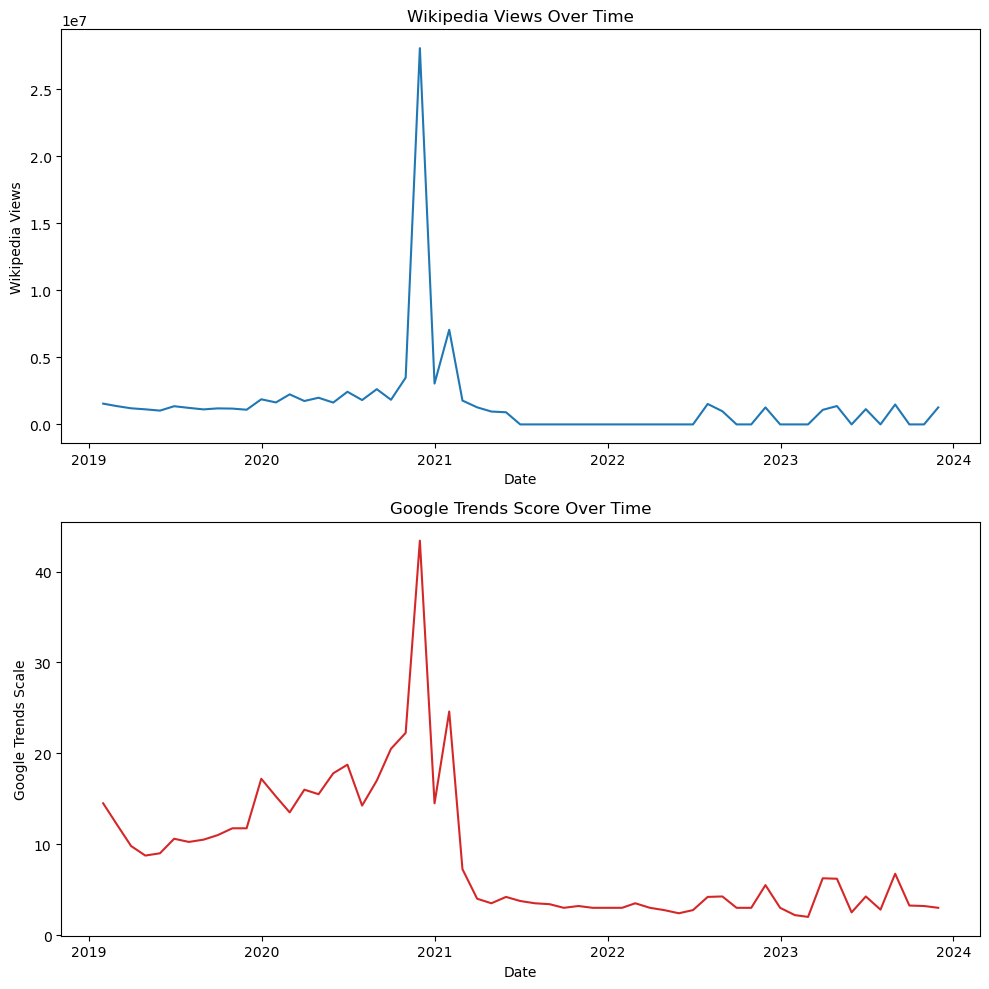

In [76]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Wikipedia views
ax1.plot(df_combined_trump['date'], df_combined_trump['views'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wikipedia Views')
ax1.set_title('Wikipedia Views Over Time')

# Google Trends
ax2.plot(df_combined_trump['date'], df_combined_trump['Donald Trump'], color='tab:red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Google Trends Scale')
ax2.set_title('Google Trends Score Over Time')

plt.tight_layout()
plt.show()

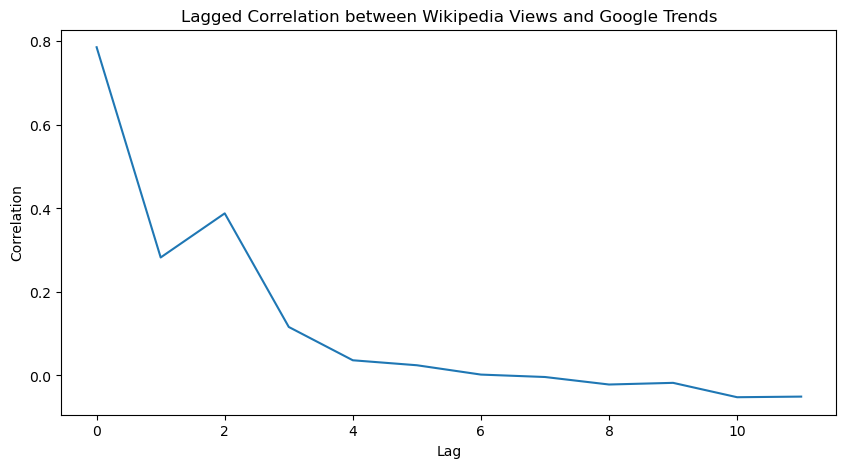

In [77]:
import numpy as np
from statsmodels.tsa.stattools import ccf

# Correlation analysis over time
max_lag = 12  # Maximum time difference setting (1 year)
correlations = [df_combined_trump['views'].shift(lag).corr(df_combined_trump['Donald Trump']) for lag in range(max_lag)]
plt.figure(figsize=(10, 5))
plt.plot(range(max_lag), correlations)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Lagged Correlation between Wikipedia Views and Google Trends')
plt.show()

/var/folders/_b/zksqq78d6tb0mb13kw60kp6h0000gn/T/ipykernel_51524/3122242225.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(ccf_values)), ccf_values, use_line_collection=True)


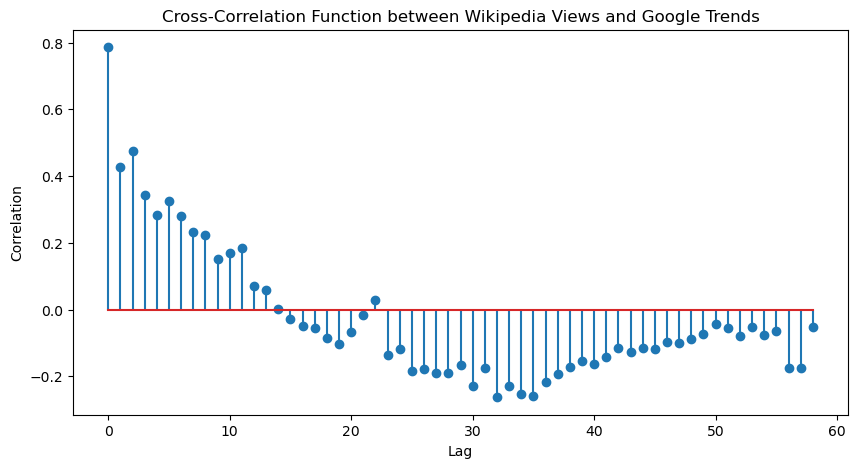

In [78]:
# CCF calculation
views = df_combined_trump['views'].values
trends_score = df_combined_trump['Donald Trump'].values

ccf_values = ccf(views, trends_score)

# CCF visualisation
plt.figure(figsize=(10, 5))
plt.stem(range(len(ccf_values)), ccf_values, use_line_collection=True)
plt.title('Cross-Correlation Function between Wikipedia Views and Google Trends')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [79]:
from statsmodels.tsa.stattools import coint

# Perform cointegration test
coint_result = coint(df_combined_trump['views'], df_combined_trump['Donald Trump'])
print(f'p-value for cointegration test: {coint_result[1]}')

p-value for cointegration test: 4.743359374829091e-07


### Joe Biden

/var/folders/_b/zksqq78d6tb0mb13kw60kp6h0000gn/T/ipykernel_51524/1503879965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joe_biden_data['date'] = pd.to_datetime(joe_biden_data['date'])


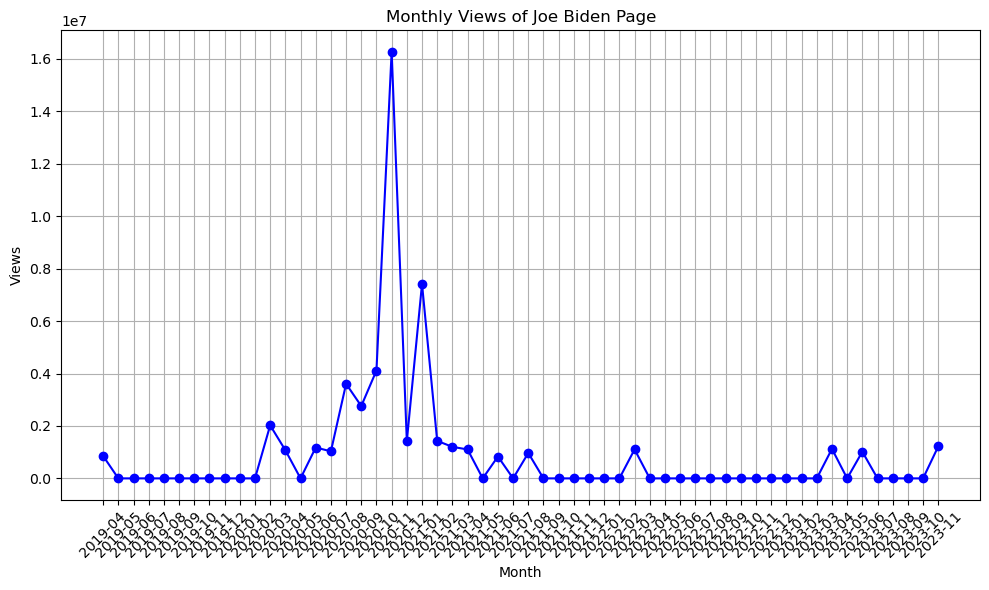

In [61]:
# Page, 'Joe Biden
joe_biden_data = df[df['Page'] == 'Joe Biden']

# Changes format of 'date' to the format 'datetime'
joe_biden_data['date'] = pd.to_datetime(joe_biden_data['date'])

# Monthly views
monthly_views_biden = joe_biden_data.set_index('date')['Views'].resample('M').sum()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(monthly_views_biden.index.strftime('%Y-%m'), monthly_views_biden.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Views of Joe Biden Page')
plt.xlabel('Month')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
monthly_views_biden

date
2019-04-30      854181
2019-05-31           0
2019-06-30           0
2019-07-31           0
2019-08-31           0
2019-09-30           0
2019-10-31           0
2019-11-30           0
2019-12-31           0
2020-01-31           0
2020-02-29           0
2020-03-31     2023868
2020-04-30     1075058
2020-05-31           0
2020-06-30     1177640
2020-07-31     1032493
2020-08-31     3606810
2020-09-30     2759708
2020-10-31     4115101
2020-11-30    16278499
2020-12-31     1423615
2021-01-31     7415448
2021-02-28     1431167
2021-03-31     1203073
2021-04-30     1104251
2021-05-31           0
2021-06-30      834861
2021-07-31           0
2021-08-31      968552
2021-09-30           0
2021-10-31           0
2021-11-30           0
2021-12-31           0
2022-01-31           0
2022-02-28           0
2022-03-31     1104911
2022-04-30           0
2022-05-31           0
2022-06-30           0
2022-07-31           0
2022-08-31           0
2022-09-30           0
2022-10-31           0
2022-1

In [80]:
# Convert monthly_views to DataFrame
df_views_biden = pd.DataFrame({'date': monthly_views_biden.index, 'views': monthly_views_biden.values})

# Convert date column to datetime format
df_views_biden['date'] = pd.to_datetime(df_views_biden['date'])

print(df_views_biden)

         date     views
0  2019-04-30    854181
1  2019-05-31         0
2  2019-06-30         0
3  2019-07-31         0
4  2019-08-31         0
5  2019-09-30         0
6  2019-10-31         0
7  2019-11-30         0
8  2019-12-31         0
9  2020-01-31         0
10 2020-02-29         0
11 2020-03-31   2023868
12 2020-04-30   1075058
13 2020-05-31         0
14 2020-06-30   1177640
15 2020-07-31   1032493
16 2020-08-31   3606810
17 2020-09-30   2759708
18 2020-10-31   4115101
19 2020-11-30  16278499
20 2020-12-31   1423615
21 2021-01-31   7415448
22 2021-02-28   1431167
23 2021-03-31   1203073
24 2021-04-30   1104251
25 2021-05-31         0
26 2021-06-30    834861
27 2021-07-31         0
28 2021-08-31    968552
29 2021-09-30         0
30 2021-10-31         0
31 2021-11-30         0
32 2021-12-31         0
33 2022-01-31         0
34 2022-02-28         0
35 2022-03-31   1104911
36 2022-04-30         0
37 2022-05-31         0
38 2022-06-30         0
39 2022-07-31         0
40 2022-08-31   

In [81]:
# Google Trends API
pytrends = TrendReq(hl='en-US', tz=360)

# Setting keyword
keywords = ["Joe Biden"]

# Setting period
start_date = '2019-01-01'
end_date = '2023-12-31'

# Extract weekly data
pytrends.build_payload(keywords, cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')

# Extract data over time
interest_over_time_df = pytrends.interest_over_time()

# Calculate weekly data to monthly data
interest_over_time_df.index = pd.to_datetime(interest_over_time_df.index)
monthly_interest_biden = interest_over_time_df.resample('M').mean()

In [82]:
monthly_interest_biden

Joe Biden  isPartial
date                            
2018-12-31       0.00        0.0
2019-01-31       0.00        0.0
2019-02-28       0.50        0.0
2019-03-31       1.60        0.0
2019-04-30       2.00        0.0
...               ...        ...
2023-08-31       1.75        0.0
2023-09-30       2.25        0.0
2023-10-31       2.00        0.0
2023-11-30       1.75        0.0
2023-12-31       1.20        0.0

[61 rows x 2 columns]

In [83]:
# Combine data (wikipedia and google trend by date)
df_combined_biden = pd.merge(df_views_biden, monthly_interest_biden, on='date')
df_combined_biden

date     views  Joe Biden  isPartial
0  2019-04-30    854181       2.00        0.0
1  2019-05-31         0       1.00        0.0
2  2019-06-30         0       1.20        0.0
3  2019-07-31         0       1.00        0.0
4  2019-08-31         0       1.00        0.0
5  2019-09-30         0       1.60        0.0
6  2019-10-31         0       1.00        0.0
7  2019-11-30         0       1.00        0.0
8  2019-12-31         0       1.20        0.0
9  2020-01-31         0       1.00        0.0
10 2020-02-29         0       2.00        0.0
11 2020-03-31   2023868       6.00        0.0
12 2020-04-30   1075058       4.50        0.0
13 2020-05-31         0       3.60        0.0
14 2020-06-30   1177640       3.75        0.0
15 2020-07-31   1032493       3.75        0.0
16 2020-08-31   3606810       8.40        0.0
17 2020-09-30   2759708       9.00        0.0
18 2020-10-31   4115101      10.75        0.0
19 2020-11-30  16278499      33.60        0.0
20 2020-12-31   1423615       3.75        0.0
21 2021-01-31   7415448      12.80        0.0
22 2021-02-28   1431167       4.00        0.0
23 2021-03-31   1203073       4.25        0.0
24 2021-04-30   1104251       2.75        0.0
25 2021-05-31         0       2.20        0.0
26 2021-06-30    834861       2.25        0.0
27 2021-07-31         0       2.00        0.0
28 2021-08-31    968552       3.60        0.0
29 2021-09-30         0       2.75        0.0
30 2021-10-31         0       2.80        0.0
31 2021-11-30         0       2.75        0.0
32 2021-12-31         0       2.25        0.0
33 2022-01-31         0       2.20        0.0
34 2022-02-28         0       3.75        0.0
35 2022-03-31   1104911       3.00        0.0
36 2022-04-30         0       2.00        0.0
37 2022-05-31         0       2.00        0.0
38 2022-06-30         0       2.75        0.0
39 2022-07-31         0       2.60        0.0
40 2022-08-31         0       1.75        0.0
41 2022-09-30         0       2.25        0.0
42 2022-10-31         0       2.00        0.0
43 2022-11-30         0       2.25        0.0
44 2022-12-31         0       1.00        0.0
45 2023-01-31         0       1.60        0.0
46 2023-02-28         0       2.50        0.0
47 2023-03-31         0       1.75        0.0
48 2023-04-30   1126850       2.40        0.0
49 2023-05-31         0       2.00        0.0
50 2023-06-30   1018429       2.25        0.0
51 2023-07-31         0       2.20        0.0
52 2023-08-31         0       1.75        0.0
53 2023-09-30         0       2.25        0.0
54 2023-10-31         0       2.00        0.0
55 2023-11-30   1217860       1.75        0.0

In [84]:
# Correlation between wikipedia views and google trend
correlation_biden = df_combined_biden['views'].corr(df_combined_biden['Joe Biden'])
print(f'Correlation between Wikipedia views and Google Trends score: {correlation_biden}')

Correlation between Wikipedia views and Google Trends score: 0.978903363412746


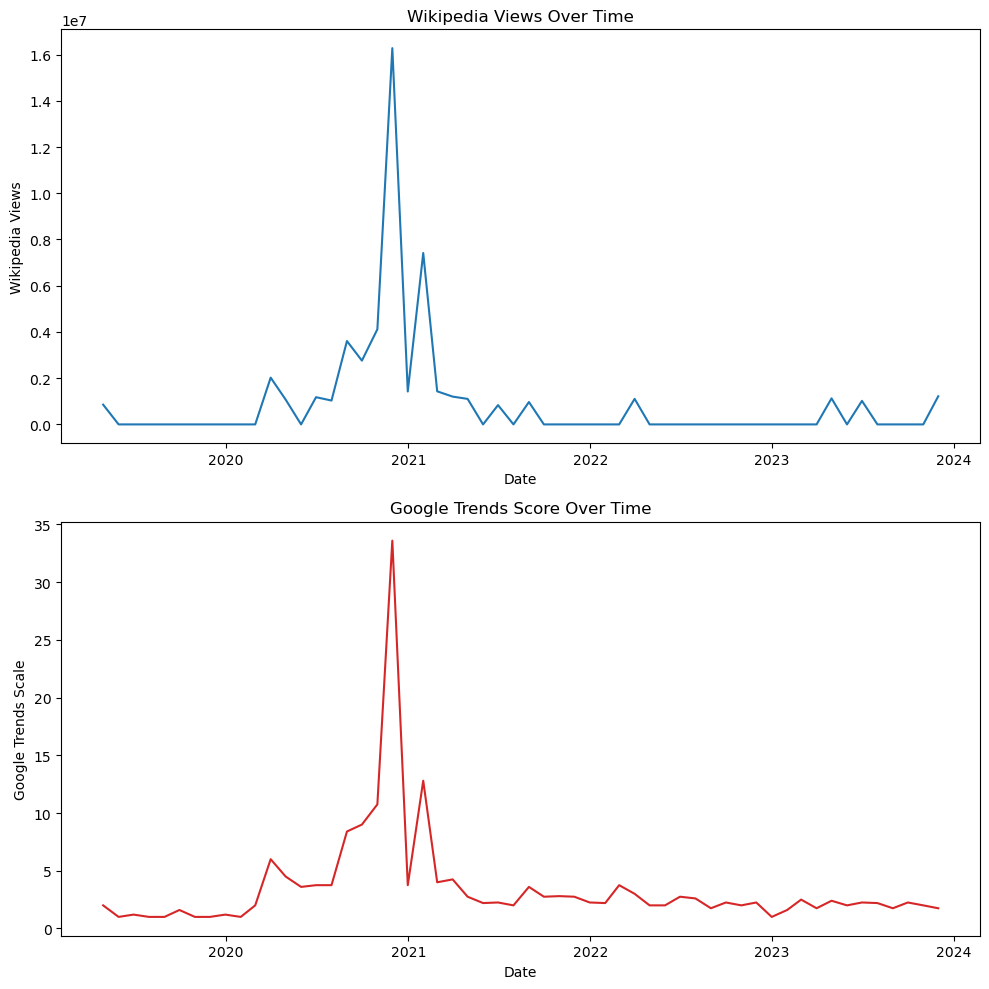

In [85]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Wikipedia views
ax1.plot(df_combined_biden['date'], df_combined_biden['views'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wikipedia Views')
ax1.set_title('Wikipedia Views Over Time')

# Google Trends
ax2.plot(df_combined_biden['date'], df_combined_biden['Joe Biden'], color='tab:red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Google Trends Scale')
ax2.set_title('Google Trends Score Over Time')

plt.tight_layout()
plt.show()

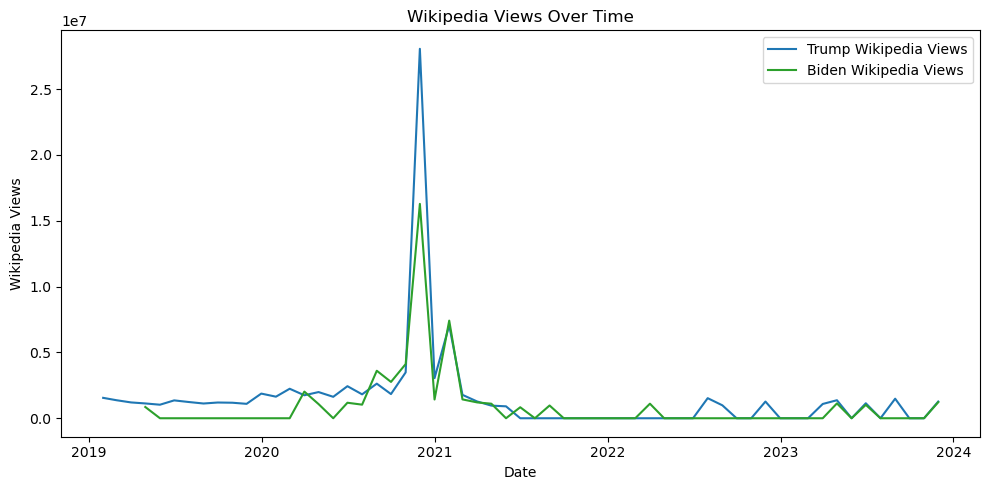

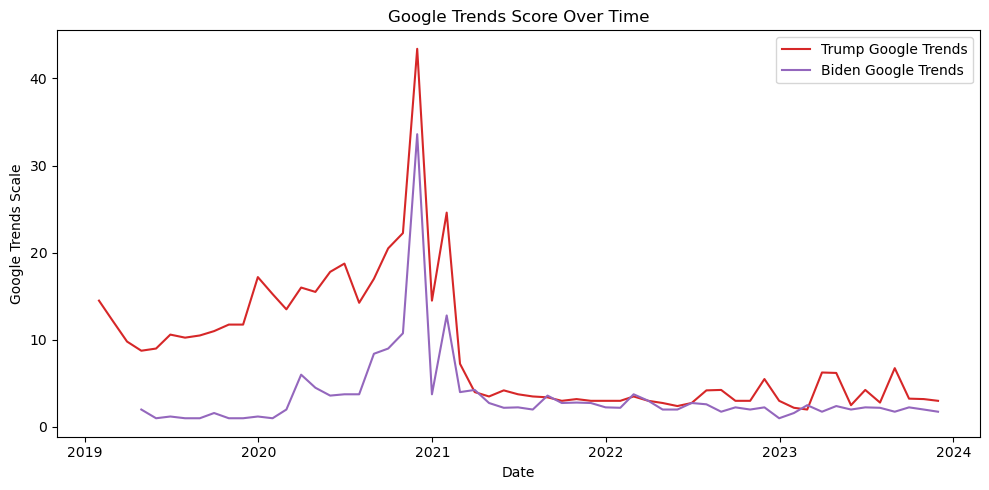

In [118]:
# Visualization for Wikipedia views
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df_combined_trump['date'], df_combined_trump['views'], color='tab:blue', label='Trump Wikipedia Views')
ax1.plot(df_combined_biden['date'], df_combined_biden['views'], color='tab:green', label='Biden Wikipedia Views')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wikipedia Views')
ax1.set_title('Wikipedia Views Over Time')
ax1.legend()

plt.tight_layout()
plt.show()

# Visualization for Google Trends
fig, ax2 = plt.subplots(figsize=(10, 5))

ax2.plot(df_combined_trump['date'], df_combined_trump['Donald Trump'], color='tab:red', label='Trump Google Trends')
ax2.plot(df_combined_biden['date'], df_combined_biden['Joe Biden'], color='tab:purple', label='Biden Google Trends')
ax2.set_xlabel('Date')
ax2.set_ylabel('Google Trends Scale')
ax2.set_title('Google Trends Score Over Time')
ax2.legend()

plt.tight_layout()
plt.show()

In [119]:
!pip install seaborn

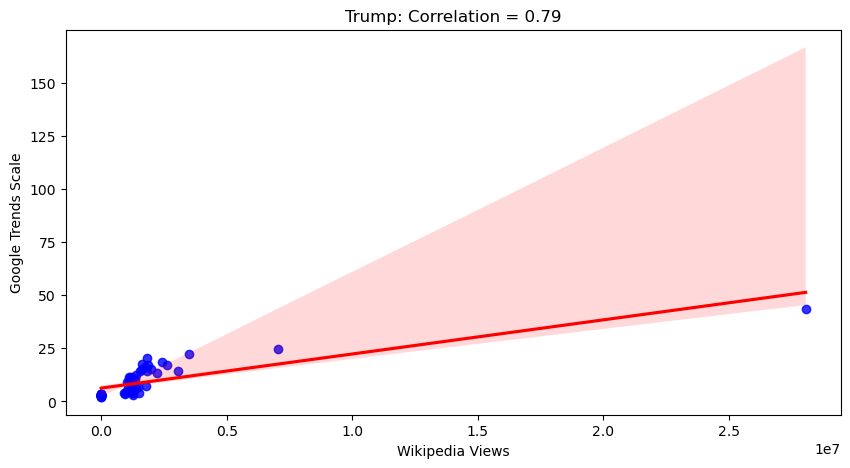

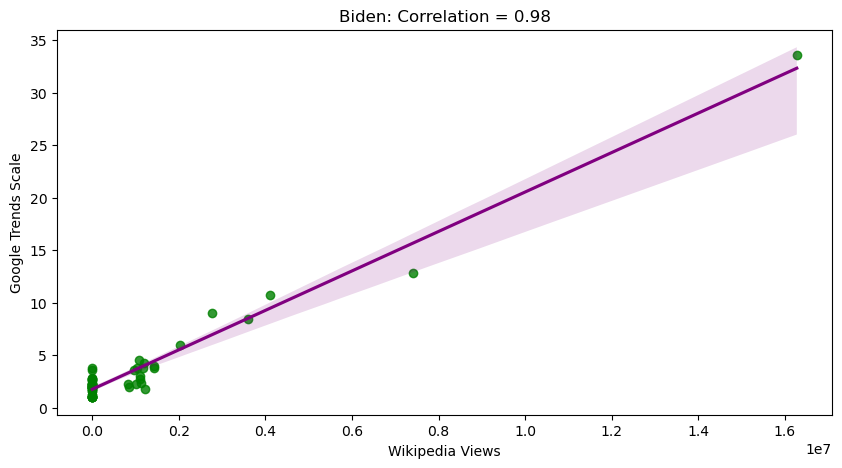

In [131]:
import seaborn as sns

# Visualisation for Trump
plt.figure(figsize=(10, 5))
sns.regplot(x=df_combined_trump['views'], y=df_combined_trump['Donald Trump'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Wikipedia Views')
plt.ylabel('Google Trends Scale')
plt.title(f'Trump: Correlation = {correlation_trump:.2f}')
plt.show()

# Visualisation for Biden
plt.figure(figsize=(10, 5))
sns.regplot(x=df_combined_biden['views'], y=df_combined_biden['Joe Biden'], scatter_kws={'color': 'green'}, line_kws={'color': 'purple'})
plt.xlabel('Wikipedia Views')
plt.ylabel('Google Trends Scale')
plt.title(f'Biden: Correlation = {correlation_biden:.2f}')
plt.show()


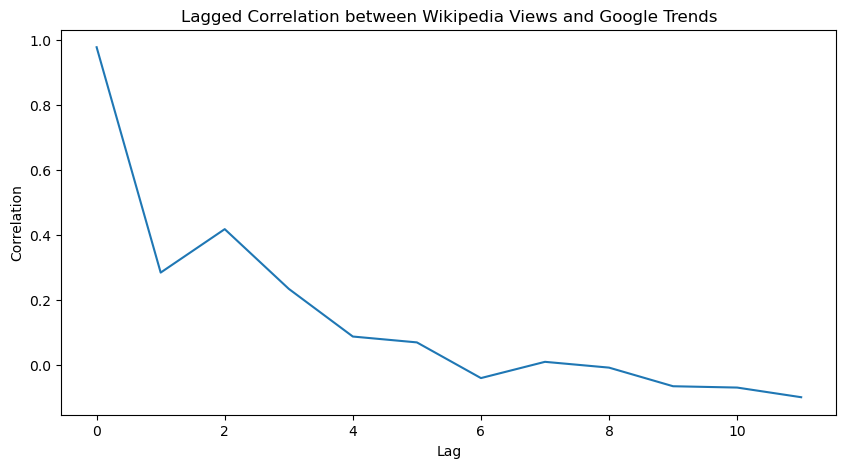

In [86]:
import numpy as np
from statsmodels.tsa.stattools import ccf

# Correlation analysis over time
max_lag = 12  # Maximum time difference setting (1 year)
correlations = [df_combined_biden['views'].shift(lag).corr(df_combined_biden['Joe Biden']) for lag in range(max_lag)]
plt.figure(figsize=(10, 5))
plt.plot(range(max_lag), correlations)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Lagged Correlation between Wikipedia Views and Google Trends')
plt.show()

/var/folders/_b/zksqq78d6tb0mb13kw60kp6h0000gn/T/ipykernel_51524/1419941985.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(ccf_values)), ccf_values, use_line_collection=True)


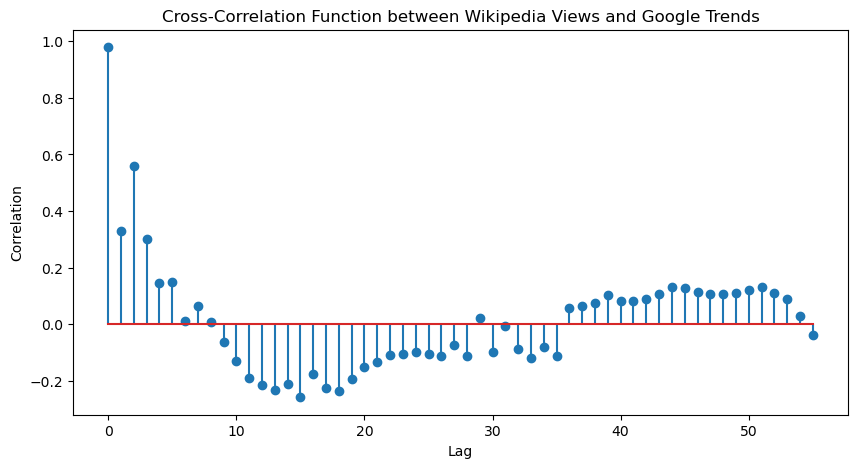

In [87]:
# CCF calculation
views = df_combined_biden['views'].values
trends_score = df_combined_biden['Joe Biden'].values

ccf_values = ccf(views, trends_score)

# CCF visualisation
plt.figure(figsize=(10, 5))
plt.stem(range(len(ccf_values)), ccf_values, use_line_collection=True)
plt.title('Cross-Correlation Function between Wikipedia Views and Google Trends')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [88]:
from statsmodels.tsa.stattools import coint

# Perform cointegration test
coint_result = coint(df_combined_biden['views'], df_combined_biden['Joe Biden'])
print(f'p-value for cointegration test: {coint_result[1]}')

p-value for cointegration test: 4.726236779243624e-06


## * Page, 'Elizabeth II' on the topic, 'Politics' (Sep-2022)]

In [89]:
# A specific month when the number of views increases on the topic 'Politics'
peak_date = '2022-09-01'  
peak_pages = df[(df['topic_label'] == 'Politics') & (df['date'] == peak_date)]

# Check Pages by Top Views
top_pages = peak_pages.sort_values(by='Views', ascending=False)

top_pages

Page  Edits  Editors     Views  \
5794                                  Elizabeth II   1152      348  26812067   
5796                                   Charles III   1424      519  12274014   
5797                                     George VI    118       79   7593233   
5800              Prince Philip, Duke of Edinburgh    133       58   5785670   
5801                      Diana, Princess of Wales    185       71   5747522   
5805        Princess Margaret, Countess of Snowdon     75       53   4805147   
5806                                   Edward VIII    118       72   4802605   
5807                          Anne, Princess Royal    132       78   4698342   
5808                                     Liz Truss    756      303   4461483   
5809                                      George V     60       37   3975230   
5810                  Prince Harry, Duke of Sussex    136       69   3764849   
5811                      William, Prince of Wales    475      184   3752243   
5813                                Queen Victoria     58       32   3674804   
5814              Queen Elizabeth The Queen Mother     68       41   3551595   
5817                   Prince Andrew, Duke of York    113       51   3345746   
5818                       Operation London Bridge    408      179   3284319   
5819                 Prince Edward, Earl of Wessex      0        0   3282644   
5822                                    Edward VII     68       39   2761886   
5824                               Balmoral Castle    287      153   2505981   
5826                      Charles, Prince of Wales     19       15   2446041   
5836                                United Kingdom    213      107   1914318   
5842              Succession to the British throne    107       66   1754242   
5844                         Charles II of England     38       26   1722404   
5846                  Catherine, Princess of Wales    252       84   1671189   
5847             List of longest-reigning monarchs    376      137   1661986   
5849  Camilla, Queen consort of the United Kingdom      1        1   1645044   
5852                Monarchy of the United Kingdom    260      134   1583930   
5853                          Charles I of England     29       19   1573909   
5855                             Winston Churchill     24       11   1524141   
5859                                  Mary of Teck     31       20   1493035   
5862                                Wallis Simpson     46       23   1491750   
5867                              House of Windsor    134       74   1450098   
5869                                   Elizabeth I     12        9   1431187   
5870                                 United States    442      102   1415861   
5872                                  Zara Tindall     35       26   1398947   
5873                                    William IV     43       20   1376737   
5880                      List of British monarchs    191       95   1276992   
5887                                Giorgia Meloni    603      160   1255239   
5889                                Peter Phillips     38       32   1245678   
5890                            Commonwealth realm    188       99   1210283   
5891                                Kwasi Kwarteng    207      117   1208986   

     Mobile %       date                                            summary  \
5794     76.5 2022-09-01  Elizabeth II (Elizabeth Alexandra Mary; 21 Apr...   
5796     76.5 2022-09-01  Charles III (Charles Philip Arthur George; bor...   
5797     81.8 2022-09-01  George VI (Albert Frederick Arthur George; 14 ...   
5800     81.4 2022-09-01  Prince Philip, Duke of Edinburgh (born Prince ...   
5801     84.0 2022-09-01  Diana, Princess of Wales (born Diana Frances S...   
5805     83.9 2022-09-01  Princess Margaret, Countess of Snowdon (Margar...   
5806     80.6 2022-09-01  Edward VIII (Edward Albert Christian George An...   
5807     80.3 2022-09-01  Anne, Princess Royal (Anne 

In [90]:
# Filtering the month '2022-09-01'
df_20220901 = df[df['date'] == '2022-09-01']

# Calculation total views of '2022-09-01'
total_views_20220901 = df_20220901['Views'].sum()

# Views of the Page, 'Elizabeth II'
views_elizabeth_ii = df_20220901.loc[df_20220901['Page'] == 'Elizabeth II', 'Views'].values[0]

# Proportion of views of the Page, 'Elizabeth II'
ratio_elizabeth_ii = views_elizabeth_ii / total_views_20220901

print(f"The proportion of views of the Page, 'Elizabeth II' on Sep, 2022 in the topic, 'Politics': {ratio_elizabeth_ii:.2%}")

The proportion of views of the Page, 'Elizabeth II' on Sep, 2022 in the topic, 'Politics': 9.14%


/var/folders/_b/zksqq78d6tb0mb13kw60kp6h0000gn/T/ipykernel_51524/2748539590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elizabeth_ii_data['date'] = pd.to_datetime(elizabeth_ii_data['date'])


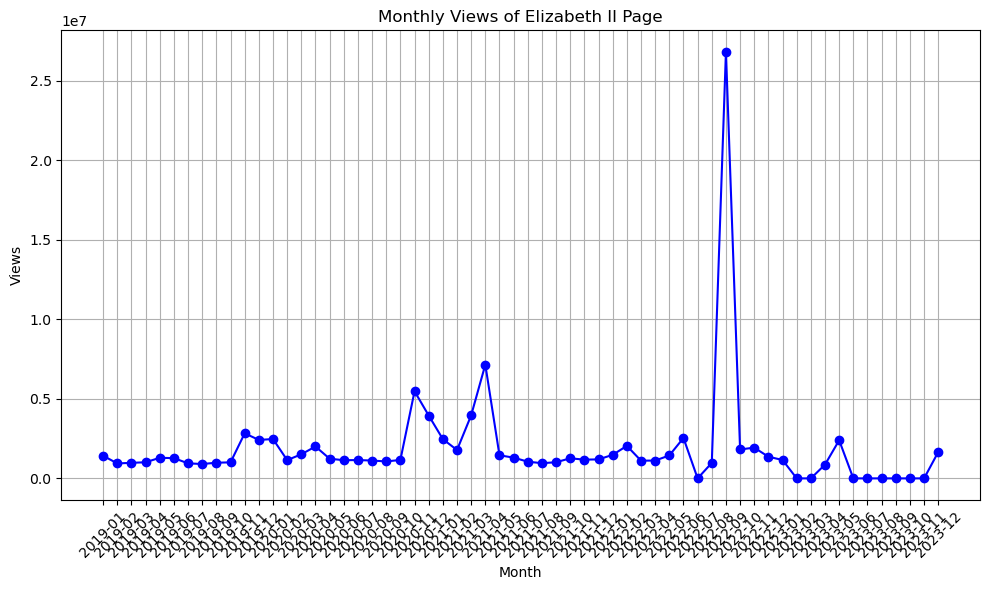

In [91]:
# Page, 'Elizabeth II'
elizabeth_ii_data = df[df['Page'] == 'Elizabeth II']

# Changes format of 'date' to the format 'datetime'
elizabeth_ii_data['date'] = pd.to_datetime(elizabeth_ii_data['date'])

# Monthly views
monthly_views = elizabeth_ii_data.set_index('date')['Views'].resample('M').sum()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(monthly_views.index.strftime('%Y-%m'), monthly_views.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Views of Elizabeth II Page')
plt.xlabel('Month')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
monthly_views

date
2019-01-31     1420565
2019-02-28      939522
2019-03-31      977761
2019-04-30     1012594
2019-05-31     1293898
2019-06-30     1272391
2019-07-31      944383
2019-08-31      903046
2019-09-30      984882
2019-10-31     1007593
2019-11-30     2832063
2019-12-31     2416844
2020-01-31     2472232
2020-02-29     1148731
2020-03-31     1513494
2020-04-30     2003835
2020-05-31     1237101
2020-06-30     1141604
2020-07-31     1151413
2020-08-31     1120896
2020-09-30     1064570
2020-10-31     1158333
2020-11-30     5475358
2020-12-31     3949632
2021-01-31     2467113
2021-02-28     1781323
2021-03-31     3961818
2021-04-30     7145630
2021-05-31     1450773
2021-06-30     1303872
2021-07-31     1049480
2021-08-31      955347
2021-09-30     1014313
2021-10-31     1262389
2021-11-30     1177417
2021-12-31     1193942
2022-01-31     1479152
2022-02-28     2043292
2022-03-31     1113605
2022-04-30     1119596
2022-05-31     1441204
2022-06-30     2539325
2022-07-31           0
2022-0

In [93]:
# Convert monthly_views to DataFrame
df_views = pd.DataFrame({'date': monthly_views.index, 'views': monthly_views.values})

# Convert date column to datetime format
df_views['date'] = pd.to_datetime(df_views['date'])

print(df_views)

         date     views
0  2019-01-31   1420565
1  2019-02-28    939522
2  2019-03-31    977761
3  2019-04-30   1012594
4  2019-05-31   1293898
5  2019-06-30   1272391
6  2019-07-31    944383
7  2019-08-31    903046
8  2019-09-30    984882
9  2019-10-31   1007593
10 2019-11-30   2832063
11 2019-12-31   2416844
12 2020-01-31   2472232
13 2020-02-29   1148731
14 2020-03-31   1513494
15 2020-04-30   2003835
16 2020-05-31   1237101
17 2020-06-30   1141604
18 2020-07-31   1151413
19 2020-08-31   1120896
20 2020-09-30   1064570
21 2020-10-31   1158333
22 2020-11-30   5475358
23 2020-12-31   3949632
24 2021-01-31   2467113
25 2021-02-28   1781323
26 2021-03-31   3961818
27 2021-04-30   7145630
28 2021-05-31   1450773
29 2021-06-30   1303872
30 2021-07-31   1049480
31 2021-08-31    955347
32 2021-09-30   1014313
33 2021-10-31   1262389
34 2021-11-30   1177417
35 2021-12-31   1193942
36 2022-01-31   1479152
37 2022-02-28   2043292
38 2022-03-31   1113605
39 2022-04-30   1119596
40 2022-05-31   

In [94]:
!pip install pytrends

In [95]:
from pytrends.request import TrendReq

In [107]:
# Google Trends API
pytrends = TrendReq(hl='en-US', tz=360)

# Setting keyword
keywords = ["Elizabeth II"]

# Setting period
start_date = '2019-01-01'
end_date = '2023-12-31'

# Extract weekly data
pytrends.build_payload(keywords, cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')

# Extract data over time
interest_over_time_df = pytrends.interest_over_time()

# Calculate weekly data to monthly data
interest_over_time_df.index = pd.to_datetime(interest_over_time_df.index)
monthly_interest = interest_over_time_df.resample('M').mean()

In [108]:
monthly_interest

Elizabeth II  isPartial
date                               
2018-12-31          1.00        0.0
2019-01-31          1.00        0.0
2019-02-28          1.00        0.0
2019-03-31          1.00        0.0
2019-04-30          1.00        0.0
...                  ...        ...
2023-08-31          0.50        0.0
2023-09-30          1.00        0.0
2023-10-31          0.20        0.0
2023-11-30          0.75        0.0
2023-12-31          1.20        0.0

[61 rows x 2 columns]

In [109]:
# Combine data (wikipedia and google trend by date)
df_combined = pd.merge(df_views, monthly_interest, on='date')
df_combined

date     views  Elizabeth II  isPartial
0  2019-01-31   1420565          1.00        0.0
1  2019-02-28    939522          1.00        0.0
2  2019-03-31    977761          1.00        0.0
3  2019-04-30   1012594          1.00        0.0
4  2019-05-31   1293898          1.00        0.0
5  2019-06-30   1272391          1.00        0.0
6  2019-07-31    944383          1.00        0.0
7  2019-08-31    903046          1.00        0.0
8  2019-09-30    984882          1.00        0.0
9  2019-10-31   1007593          1.00        0.0
10 2019-11-30   2832063          1.50        0.0
11 2019-12-31   2416844          1.40        0.0
12 2020-01-31   2472232          1.50        0.0
13 2020-02-29   1148731          1.00        0.0
14 2020-03-31   1513494          1.40        0.0
15 2020-04-30   2003835          1.50        0.0
16 2020-05-31   1237101          1.00        0.0
17 2020-06-30   1141604          1.00        0.0
18 2020-07-31   1151413          1.00        0.0
19 2020-08-31   1120896          1.00        0.0
20 2020-09-30   1064570          1.00        0.0
21 2020-10-31   1158333          1.00        0.0
22 2020-11-30   5475358          2.40        0.0
23 2020-12-31   3949632          2.00        0.0
24 2021-01-31   2467113          1.40        0.0
25 2021-02-28   1781323          1.00        0.0
26 2021-03-31   3961818          1.75        0.0
27 2021-04-30   7145630          4.50        0.0
28 2021-05-31   1450773          1.00        0.0
29 2021-06-30   1303872          1.00        0.0
30 2021-07-31   1049480          1.00        0.0
31 2021-08-31    955347          1.00        0.0
32 2021-09-30   1014313          1.00        0.0
33 2021-10-31   1262389          1.00        0.0
34 2021-11-30   1177417          1.00        0.0
35 2021-12-31   1193942          1.00        0.0
36 2022-01-31   1479152          1.00        0.0
37 2022-02-28   2043292          2.25        0.0
38 2022-03-31   1113605          1.00        0.0
39 2022-04-30   1119596          1.00        0.0
40 2022-05-31   1441204          2.00        0.0
41 2022-06-30   2539325          1.50        0.0
42 2022-07-31         0          1.00        0.0
43 2022-08-31    973195          1.00        0.0
44 2022-09-30  26812067         40.50        0.0
45 2022-10-31   1816657          1.40        0.0
46 2022-11-30   1932699          1.25        0.0
47 2022-12-31   1359828          1.00        0.0
48 2023-01-31   1156681          1.00        0.0
49 2023-02-28         0          1.00        0.0
50 2023-03-31         0          1.00        0.0
51 2023-04-30    865518          1.20        0.0
52 2023-05-31   2396240          1.25        0.0
53 2023-06-30         0          1.00        0.0
54 2023-07-31         0          0.00        0.0
55 2023-08-31         0          0.50        0.0
56 2023-09-30         0          1.00        0.0
57 2023-10-31         0          0.20        0.0
58 2023-11-30         0          0.75        0.0
59 2023-12-31   1656586          1.20        0.0

In [110]:
# Correlation between wikipedia views and google trend
correlation = df_combined['views'].corr(df_combined['Elizabeth II'])
print(f'Correlation between Wikipedia views and Google Trends score: {correlation}')

Correlation between Wikipedia views and Google Trends score: 0.9635150360374769


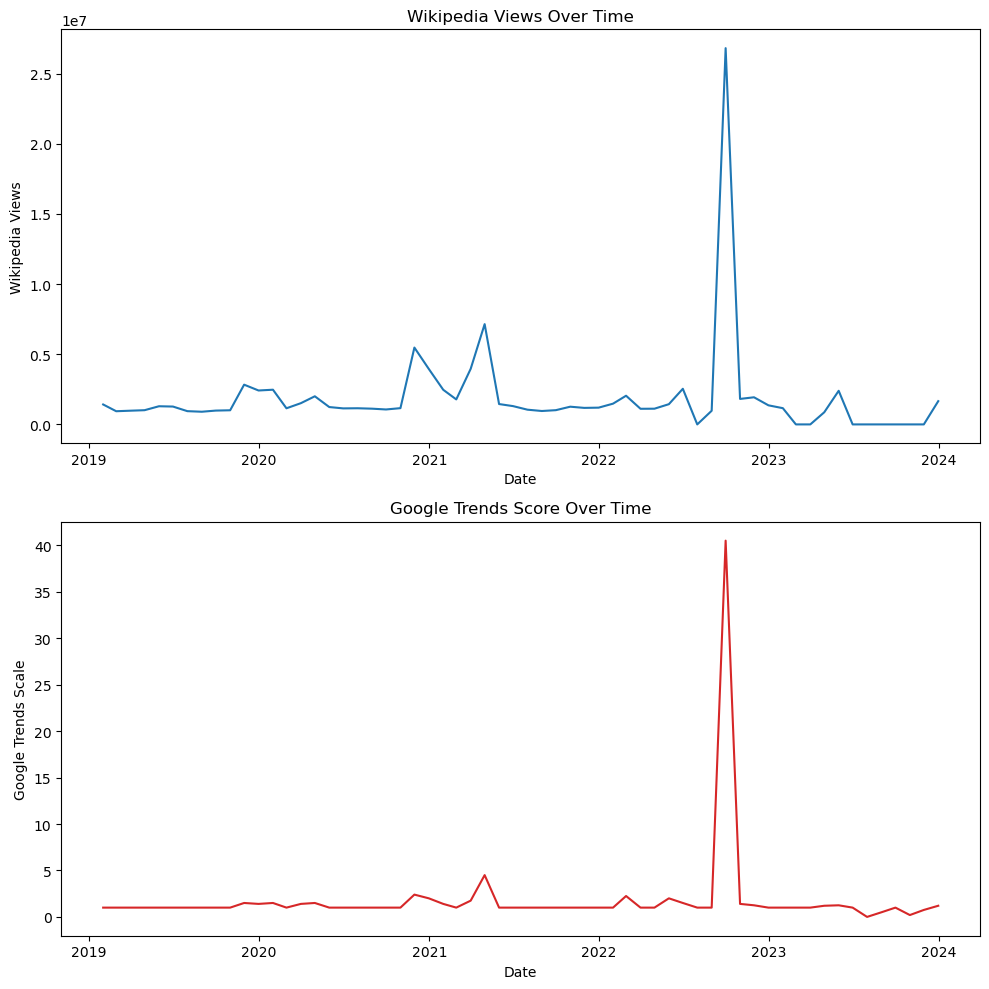

In [111]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Wikipedia views
ax1.plot(df_combined['date'], df_combined['views'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wikipedia Views')
ax1.set_title('Wikipedia Views Over Time')

# Google Trends
ax2.plot(df_combined['date'], df_combined['Elizabeth II'], color='tab:red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Google Trends Scale')
ax2.set_title('Google Trends Score Over Time')

plt.tight_layout()
plt.show()

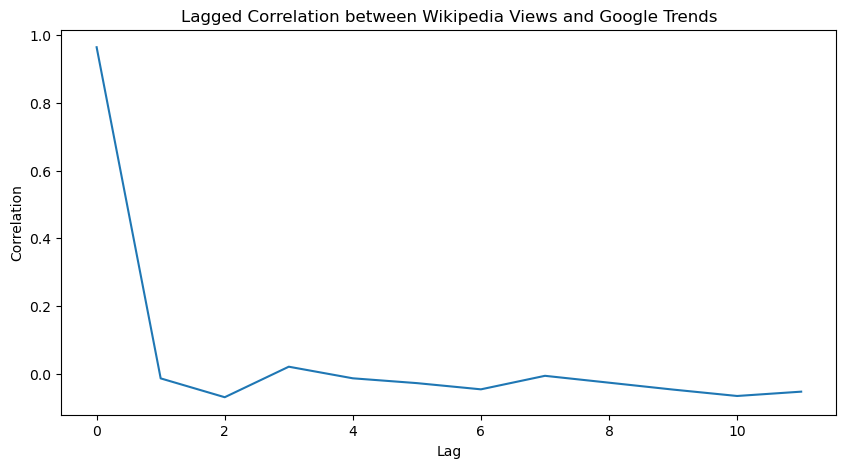

In [112]:
import numpy as np
from statsmodels.tsa.stattools import ccf

# Correlation analysis over time
max_lag = 12  # Maximum time difference setting (1 year)
correlations = [df_combined['views'].shift(lag).corr(df_combined['Elizabeth II']) for lag in range(max_lag)]
plt.figure(figsize=(10, 5))
plt.plot(range(max_lag), correlations)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Lagged Correlation between Wikipedia Views and Google Trends')
plt.show()

/var/folders/_b/zksqq78d6tb0mb13kw60kp6h0000gn/T/ipykernel_51524/3151406407.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(ccf_values)), ccf_values, use_line_collection=True)


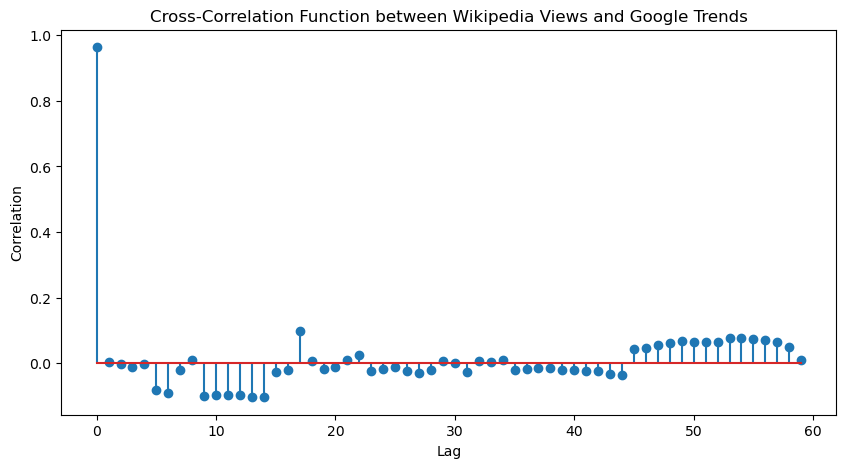

In [113]:
# CCF calculation
views = df_combined['views'].values
trends_score = df_combined['Elizabeth II'].values

ccf_values = ccf(views, trends_score)

# CCF visualisation
plt.figure(figsize=(10, 5))
plt.stem(range(len(ccf_values)), ccf_values, use_line_collection=True)
plt.title('Cross-Correlation Function between Wikipedia Views and Google Trends')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [114]:
from statsmodels.tsa.stattools import coint

# Perform cointegration test
coint_result = coint(df_combined['views'], df_combined['Elizabeth II'])
print(f'p-value for cointegration test: {coint_result[1]}')

p-value for cointegration test: 0.0007285686185662352


## 3. Edits vs. Views

In [115]:
# Correlation between Edits and Views

correlation = df['Edits'].corr(df['Views'])
print(f"Correlation between Edits and Views: {correlation}")

Correlation between Edits and Views: 0.17923734696846952


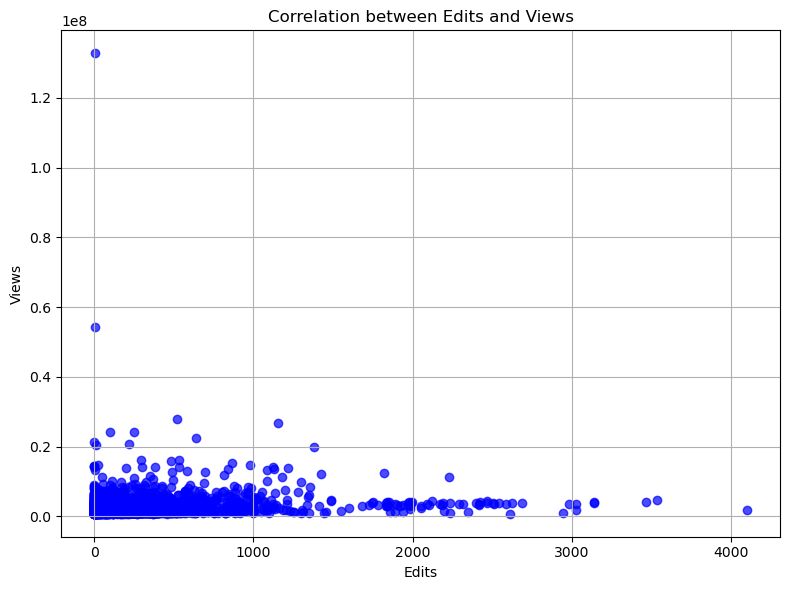

In [116]:
# scatter plot for correlation between Edits and Views

plt.figure(figsize=(8, 6))
plt.scatter(df['Edits'], df['Views'], color='b', alpha=0.7)
plt.title('Correlation between Edits and Views')
plt.xlabel('Edits')
plt.ylabel('Views')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Mobile usage by topic

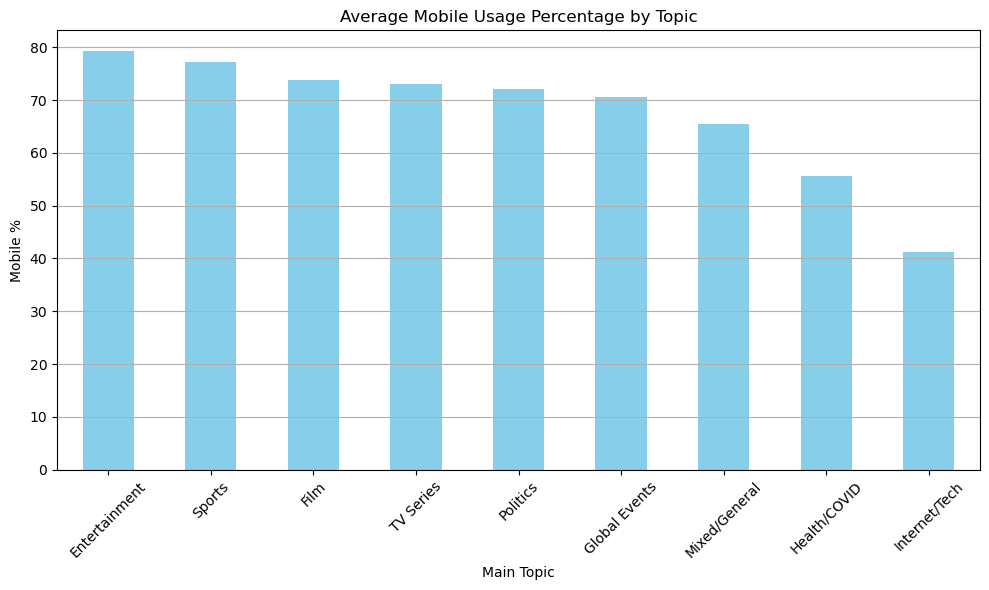

In [117]:
import numpy as np

# '< 0.1' = NaN, convert remaining values to float
df['Mobile %'] = pd.to_numeric(df['Mobile %'].replace('< 0.1', np.nan))

# Calculate Mobile % average per topic only with non-NaN values
topic_mobile_mean = df.dropna(subset=['Mobile %']).groupby('topic_label')['Mobile %'].mean().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
topic_mobile_mean.plot(kind='bar', color='skyblue')
plt.title('Average Mobile Usage Percentage by Topic')
plt.xlabel('Main Topic')
plt.ylabel('Mobile %')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 3. Ontology

## 3-1. Install and Import Required Libraries

In [ ]:
#!pip install rdflib SPARQLWrapper

In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm

## 3-2. Query DBpedia

* use SPARQL to query DBpedia and retrieve relevant annotations for your text data.

## 3-3. Data Preprocessing

* Preprocess your text to extract entities that can be mapped to DBpedia.

In [ ]:
#import pandas as pd
#import spacy
#import requests
#from SPARQLWrapper import SPARQLWrapper, JSON
#import time
#import re
#import nltk
#from nltk.corpus import stopwords

# Download stopwords from nltk
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

# Load spacy model
#nlp = spacy.load("en_core_web_sm")

# Text Preprocessing
#def preprocess_text(text):
#    text = text.lower()  # Convert to lowercase
#    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#    tokens = text.split()  # Tokenize
#    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
#    return ' '.join(tokens)

# Preprocess titles
#df2['processed_title'] = df2['Page'].apply(preprocess_text)


In [ ]:
#df2

## 3-5. Entity Recognition and Annotation

* Use an entity recognition tool to extract entities from the text, and then query DBpedia to get their types.

In [ ]:
#def query_dbpedia(entity):
#    sparql = SPARQLWrapper("http://dbpedia.org/sparql")
#    query = f"""
#    SELECT ?type WHERE {{
#      dbr:{entity} rdf:type ?type
#    }}
#    """
#    sparql.setQuery(query)
#    sparql.setReturnFormat(JSON)
    
#    try:
#        results = sparql.query().convert()
#        types = [result["type"]["value"] for result in results["results"]["bindings"]]
#        return types
#    except Exception as e:
#        print(f"Error querying DBpedia for {entity}: {e}")
#        return []

#def extract_entities(text):
#    doc = nlp(text)
#    return [ent.text for ent in doc.ents]

#def annotate_with_dbpedia(entities):
#    annotations = []
#    for entity in entities:
#        retry_count = 3
#        for _ in range(retry_count):
#            dbpedia_types = query_dbpedia(entity.replace(" ", "_"))
#            if dbpedia_types:
#                annotations.extend(dbpedia_types)
#                break
#            else:
#                time.sleep(2)  # Wait before retrying
#    return annotations


In [ ]:
# Extract entities from processed titles
#df2['entities'] = df2['processed_title'].apply(extract_entities)

# Annotate with DBpedia
#df2['dbpedia_annotations'] = df2['entities'].apply(annotate_with_dbpedia)

#print(df2)

## 3-6. Topic Assignment

* Map the DBpedia types to your topics.

In [ ]:
# Example mapping
#topic_mapping = {
#    "http://dbpedia.org/ontology/Person": "Politics",
#    "http://dbpedia.org/ontology/Film": "Entertainment",
#    "http://dbpedia.org/ontology/SportsTeam": "Sports",
    # Add more mappings as needed
#}

#def assign_topic(annotations):
#    for annotation in annotations:
#        if annotation in topic_mapping:
#            return topic_mapping[annotation]
#    return "Other"

#df2['topic'] = df2['dbpedia_annotations'].apply(assign_topic)


## 4. BERT

## 4-1. Data Preprocessing

* Preprocess the text by lowercasing, removing stop words, and lemmatizing.

In [ ]:
#!pip install sentence-transformers

In [ ]:
#from sentence_transformers import SentenceTransformer
#from sklearn.cluster import KMeans
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary NLTK data
#nltk.download('stopwords')
#nltk.download('wordnet')

In [ ]:
# Initialize stop words and lemmatizer
#stop_words = set(stopwords.words('english'))
#lemmatizer = WordNetLemmatizer()

In [ ]:
# Text Preprocessing Function
#def preprocess_text(text):
#    tokens = text.lower().split()
#    tokens = [word for word in tokens if word not in stop_words]
#    tokens = [lemmatizer.lemmatize(word) for word in tokens]
#    return ' '.join(tokens)

# Apply preprocessing to summaries
#df3['processed_summary'] = df3['summary'].apply(preprocess_text)

In [ ]:
#df3

## 4-2. BERT embeddings

* Use the SentenceTransformer model to generate sentence embeddings for each preprocessed summary.

In [ ]:
# Use a smaller model
#model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Function to generate embeddings in batches
#def batch_encode(texts, model, batch_size=32):
#    embeddings = []
#    for i in range(0, len(texts), batch_size):
#        batch = texts[i:i + batch_size]
#        batch_embeddings = model.encode(batch)
#        embeddings.extend(batch_embeddings)
#    return np.array(embeddings)

# Generate BERT embeddings in batches
#texts = df3['processed_summary'].tolist()
#embeddings = batch_encode(texts, model)

## 4-3. Clustering

* Apply KMeans clustering to group the embeddings into clusters.
* Assign cluster labels to the original dataframe.
* Print the top texts from each cluster to manually inspect and evaluate the clustering quality.

In [ ]:
# Clustering
#num_clusters = 10
#clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
#clustering_model.fit(embeddings)
#cluster_assignment = clustering_model.labels_

# Assign clusters to dataframe
#df3['cluster'] = cluster_assignment

# Display clusters
#for i in range(num_clusters):
#    cluster_texts = df3[df3['cluster'] == i]['processed_summary']
#    print(f"Cluster {i}:")
#    print(cluster_texts.head(10))
#    print("\n")